# Telecom Churn Prediction

## Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


## Objectives

The main goal of the case study is to build ML models to predict churn. The predictive model built will be used for the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. While overall accuracy is an important evaluation metric, it's also essential to consider other metrics like precision, recall, and more when evaluating different models. For example, in this case, one business goal could be to develop a model that identifies customers who are likely to churn with greater accuracy than those who are not. In such scenarios, metrics like recall or precision can be more useful, depending on the specific business objectives.

4. Recommend strategies to manage customer churn based on observations.

<b> The solution is divided into following sections </b>
1. Data loading and understanding 
2. Preprocessing
3. EDA
4. Data preparation
5. Model Building and Evaluation

## 1. Data Loading and Understanding

First, let’s import the necessary libraries and examine the dataset to understand its size, attribute names etc.

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

#For visualizing missing data
import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import xgboost as xgb  
# Importing statsmodels
import statsmodels.api as sm



#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Reading the dataset
train = pd.read_csv(r"D:\Main course\telecom churn Kaggle competition\train.csv")
unseen = pd.read_csv(r"D:\Main course\telecom churn Kaggle competition\test.csv")
sample = pd.read_csv(r"D:\Main course\telecom churn Kaggle competition\sample.csv")
data_dict = pd.read_csv(r"D:\Main course\telecom churn Kaggle competition\data_dictionary.csv")
print(train.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
unique_counts = train.nunique()

# Print each column and its unique count
for column, count in unique_counts.items():
    print(f'{column}: {count}')

id: 69999
circle_id: 1
loc_og_t2o_mou: 1
std_og_t2o_mou: 1
loc_ic_t2o_mou: 1
last_date_of_month_6: 1
last_date_of_month_7: 1
last_date_of_month_8: 1
arpu_6: 61615
arpu_7: 61425
arpu_8: 60194
onnet_mou_6: 20057
onnet_mou_7: 20076
onnet_mou_8: 19725
offnet_mou_6: 26254
offnet_mou_7: 26139
offnet_mou_8: 25995
roam_ic_mou_6: 5306
roam_ic_mou_7: 4240
roam_ic_mou_8: 4252
roam_og_mou_6: 6568
roam_og_mou_7: 5305
roam_og_mou_8: 5215
loc_og_t2t_mou_6: 11491
loc_og_t2t_mou_7: 11359
loc_og_t2t_mou_8: 11296
loc_og_t2m_mou_6: 17848
loc_og_t2m_mou_7: 17641
loc_og_t2m_mou_8: 17616
loc_og_t2f_mou_6: 3376
loc_og_t2f_mou_7: 3365
loc_og_t2f_mou_8: 3311
loc_og_t2c_mou_6: 1945
loc_og_t2c_mou_7: 2103
loc_og_t2c_mou_8: 2204
loc_og_mou_6: 22309
loc_og_mou_7: 22012
loc_og_mou_8: 21950
std_og_t2t_mou_6: 14554
std_og_t2t_mou_7: 14745
std_og_t2t_mou_8: 14483
std_og_t2m_mou_6: 16059
std_og_t2m_mou_7: 16234
std_og_t2m_mou_8: 15968
std_og_t2f_mou_6: 2074
std_og_t2f_mou_7: 1991
std_og_t2f_mou_8: 1945
std_og_t2c_mou_6:

In [6]:
# Identify constant columns (same value in all rows)
constant_columns = [col for col in train.columns if train[col].nunique() == 1]
print("Constant columns:", constant_columns)

Constant columns: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [7]:
#Columns with only one unique value provide no variation and are irrelevant. So dropping these columns
train_filtered = train.drop(columns=constant_columns)
unseen_filtered = unseen.drop(columns=constant_columns)
print(train_filtered.shape)
print(unseen_filtered.shape)

(69999, 159)
(30000, 158)


In [8]:
date_cols = [i for i in list(train_filtered.columns) if re.search('date',i)]
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [9]:
# Dropping date columns as they are not useful for our analysis
train_filtered = train_filtered.drop(columns=date_cols)
unseen_filtered = unseen_filtered.drop(columns=date_cols)
print(train_filtered.shape)
print(unseen_filtered.shape)

(69999, 153)
(30000, 152)


In [10]:
#special calls. 
#This could refer to emergency or unique service calls, which are likely rare events and may not be significant for predicting churn.
spc_cols = [i for i in list(train_filtered.columns) if re.search('spl',i)]

In [11]:
# Dropping special columns as they are not useful for our analysis from the training set
train_filtered = train_filtered.drop(columns=spc_cols)
unseen_filtered = unseen_filtered.drop(columns=spc_cols)
print(train_filtered.shape)
print(unseen_filtered.shape)

(69999, 147)
(30000, 146)


In [12]:
t2c_cols = [i for i in list(train_filtered.columns) if re.search('t2c',i)]

Calls made to the operator's call center might not be as useful, as they may not necessarily indicate dissatisfaction or churn. While it could reflect customer complaints, not every call to the call center relates to churn, so it may have lower predictive value.

In [13]:
# Dropping t2c columns as they are not useful for our analysis from the training set
train_filtered = train_filtered.drop(columns=t2c_cols)
unseen_filtered = unseen_filtered.drop(columns=t2c_cols)
print(train_filtered.shape)
print(unseen_filtered.shape)

(69999, 144)
(30000, 143)


### Handling missing data

In [14]:
# Iterate through the missing values of train_filtered df and print each entry
missing_percent = 100*train_filtered.isnull().mean().round(2)

for col, val in missing_percent.items():  # Use items() instead of iteritems()
    print(f"{col}: {val}")

id: 0.0
arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 4.0
onnet_mou_7: 4.0
onnet_mou_8: 5.0
offnet_mou_6: 4.0
offnet_mou_7: 4.0
offnet_mou_8: 5.0
roam_ic_mou_6: 4.0
roam_ic_mou_7: 4.0
roam_ic_mou_8: 5.0
roam_og_mou_6: 4.0
roam_og_mou_7: 4.0
roam_og_mou_8: 5.0
loc_og_t2t_mou_6: 4.0
loc_og_t2t_mou_7: 4.0
loc_og_t2t_mou_8: 5.0
loc_og_t2m_mou_6: 4.0
loc_og_t2m_mou_7: 4.0
loc_og_t2m_mou_8: 5.0
loc_og_t2f_mou_6: 4.0
loc_og_t2f_mou_7: 4.0
loc_og_t2f_mou_8: 5.0
loc_og_mou_6: 4.0
loc_og_mou_7: 4.0
loc_og_mou_8: 5.0
std_og_t2t_mou_6: 4.0
std_og_t2t_mou_7: 4.0
std_og_t2t_mou_8: 5.0
std_og_t2m_mou_6: 4.0
std_og_t2m_mou_7: 4.0
std_og_t2m_mou_8: 5.0
std_og_t2f_mou_6: 4.0
std_og_t2f_mou_7: 4.0
std_og_t2f_mou_8: 5.0
std_og_mou_6: 4.0
std_og_mou_7: 4.0
std_og_mou_8: 5.0
isd_og_mou_6: 4.0
isd_og_mou_7: 4.0
isd_og_mou_8: 5.0
og_others_6: 4.0
og_others_7: 4.0
og_others_8: 5.0
total_og_mou_6: 0.0
total_og_mou_7: 0.0
total_og_mou_8: 0.0
loc_ic_t2t_mou_6: 4.0
loc_ic_t2t_mou_7: 4.0
loc_ic_t2t_mou_8: 5.0
lo

In [15]:
# Iterate through the missing values of unseen_filtered df and print each entry
missing_percent_unseen = 100*unseen_filtered.isnull().mean().round(2)

for col, val in missing_percent_unseen.items():  # Use items() instead of iteritems()
    print(f"{col}: {val}")

id: 0.0
arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 4.0
onnet_mou_7: 4.0
onnet_mou_8: 6.0
offnet_mou_6: 4.0
offnet_mou_7: 4.0
offnet_mou_8: 6.0
roam_ic_mou_6: 4.0
roam_ic_mou_7: 4.0
roam_ic_mou_8: 6.0
roam_og_mou_6: 4.0
roam_og_mou_7: 4.0
roam_og_mou_8: 6.0
loc_og_t2t_mou_6: 4.0
loc_og_t2t_mou_7: 4.0
loc_og_t2t_mou_8: 6.0
loc_og_t2m_mou_6: 4.0
loc_og_t2m_mou_7: 4.0
loc_og_t2m_mou_8: 6.0
loc_og_t2f_mou_6: 4.0
loc_og_t2f_mou_7: 4.0
loc_og_t2f_mou_8: 6.0
loc_og_mou_6: 4.0
loc_og_mou_7: 4.0
loc_og_mou_8: 6.0
std_og_t2t_mou_6: 4.0
std_og_t2t_mou_7: 4.0
std_og_t2t_mou_8: 6.0
std_og_t2m_mou_6: 4.0
std_og_t2m_mou_7: 4.0
std_og_t2m_mou_8: 6.0
std_og_t2f_mou_6: 4.0
std_og_t2f_mou_7: 4.0
std_og_t2f_mou_8: 6.0
std_og_mou_6: 4.0
std_og_mou_7: 4.0
std_og_mou_8: 6.0
isd_og_mou_6: 4.0
isd_og_mou_7: 4.0
isd_og_mou_8: 6.0
og_others_6: 4.0
og_others_7: 4.0
og_others_8: 6.0
total_og_mou_6: 0.0
total_og_mou_7: 0.0
total_og_mou_8: 0.0
loc_ic_t2t_mou_6: 4.0
loc_ic_t2t_mou_7: 4.0
loc_ic_t2t_mou_8: 6.0
lo

In [16]:
# Filter out columns that have more than 70% missing values
columns_to_drop = missing_percent[missing_percent > 70].index
# Drop the columns with more than 70% missing values in place
train_filtered = train_filtered.drop(columns=columns_to_drop)
unseen_filtered = unseen_filtered.drop(columns=columns_to_drop)
print(train_filtered.shape)
print(unseen_filtered.shape)

(69999, 117)
(30000, 116)


In [17]:
missing_data_percent = train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f

In [18]:
#Imputing missing values by median
train_filtered[impute_cols] = train_filtered[impute_cols].fillna(train_filtered.median())
unseen_filtered[impute_cols] = unseen_filtered[impute_cols].fillna(train_filtered.median())

In [19]:
# Iterate through the missing values and print each entry
missing_percent_train = 100*train_filtered.isnull().mean().round(2)

for col, val in missing_percent_train.items():  # Use items() instead of iteritems()
    print(f"{col}: {val}")

id: 0.0
arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 0.0
onnet_mou_7: 0.0
onnet_mou_8: 0.0
offnet_mou_6: 0.0
offnet_mou_7: 0.0
offnet_mou_8: 0.0
roam_ic_mou_6: 0.0
roam_ic_mou_7: 0.0
roam_ic_mou_8: 0.0
roam_og_mou_6: 0.0
roam_og_mou_7: 0.0
roam_og_mou_8: 0.0
loc_og_t2t_mou_6: 0.0
loc_og_t2t_mou_7: 0.0
loc_og_t2t_mou_8: 0.0
loc_og_t2m_mou_6: 0.0
loc_og_t2m_mou_7: 0.0
loc_og_t2m_mou_8: 0.0
loc_og_t2f_mou_6: 0.0
loc_og_t2f_mou_7: 0.0
loc_og_t2f_mou_8: 0.0
loc_og_mou_6: 0.0
loc_og_mou_7: 0.0
loc_og_mou_8: 0.0
std_og_t2t_mou_6: 0.0
std_og_t2t_mou_7: 0.0
std_og_t2t_mou_8: 0.0
std_og_t2m_mou_6: 0.0
std_og_t2m_mou_7: 0.0
std_og_t2m_mou_8: 0.0
std_og_t2f_mou_6: 0.0
std_og_t2f_mou_7: 0.0
std_og_t2f_mou_8: 0.0
std_og_mou_6: 0.0
std_og_mou_7: 0.0
std_og_mou_8: 0.0
isd_og_mou_6: 0.0
isd_og_mou_7: 0.0
isd_og_mou_8: 0.0
og_others_6: 0.0
og_others_7: 0.0
og_others_8: 0.0
total_og_mou_6: 0.0
total_og_mou_7: 0.0
total_og_mou_8: 0.0
loc_ic_t2t_mou_6: 0.0
loc_ic_t2t_mou_7: 0.0
loc_ic_t2t_mou_8: 0.0
lo

In [20]:
# Iterate through the missing values and print each entry
missing_percent_unseen = 100*unseen_filtered.isnull().mean().round(2)

for col, val in missing_percent_unseen.items():  # Use items() instead of iteritems()
    print(f"{col}: {val}")

id: 0.0
arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 0.0
onnet_mou_7: 0.0
onnet_mou_8: 0.0
offnet_mou_6: 0.0
offnet_mou_7: 0.0
offnet_mou_8: 0.0
roam_ic_mou_6: 0.0
roam_ic_mou_7: 0.0
roam_ic_mou_8: 0.0
roam_og_mou_6: 0.0
roam_og_mou_7: 0.0
roam_og_mou_8: 0.0
loc_og_t2t_mou_6: 0.0
loc_og_t2t_mou_7: 0.0
loc_og_t2t_mou_8: 0.0
loc_og_t2m_mou_6: 0.0
loc_og_t2m_mou_7: 0.0
loc_og_t2m_mou_8: 0.0
loc_og_t2f_mou_6: 0.0
loc_og_t2f_mou_7: 0.0
loc_og_t2f_mou_8: 0.0
loc_og_mou_6: 0.0
loc_og_mou_7: 0.0
loc_og_mou_8: 0.0
std_og_t2t_mou_6: 0.0
std_og_t2t_mou_7: 0.0
std_og_t2t_mou_8: 0.0
std_og_t2m_mou_6: 0.0
std_og_t2m_mou_7: 0.0
std_og_t2m_mou_8: 0.0
std_og_t2f_mou_6: 0.0
std_og_t2f_mou_7: 0.0
std_og_t2f_mou_8: 0.0
std_og_mou_6: 0.0
std_og_mou_7: 0.0
std_og_mou_8: 0.0
isd_og_mou_6: 0.0
isd_og_mou_7: 0.0
isd_og_mou_8: 0.0
og_others_6: 0.0
og_others_7: 0.0
og_others_8: 0.0
total_og_mou_6: 0.0
total_og_mou_7: 0.0
total_og_mou_8: 0.0
loc_ic_t2t_mou_6: 0.0
loc_ic_t2t_mou_7: 0.0
loc_ic_t2t_mou_8: 0.0
lo

Missing values have been handled

In [21]:
print(train_filtered.shape)
print(unseen_filtered.shape)

(69999, 117)
(30000, 116)


In [22]:
#Organize columns by category
categories = {
    'ARPU': ['arpu_6', 'arpu_7', 'arpu_8'],
    
    'On-Net': ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'],
    
    'Off-Net': ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'],
    
    'Outgoing': ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                 'og_others_6', 'og_others_7', 'og_others_8',
                 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'],
    
    'Incoming': ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
                 'ic_others_6', 'ic_others_7', 'ic_others_8'],
    
    'Recharge': ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
                 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'],
    
    'Data': ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
             'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
             'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
    
    'Plan': ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
             'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
             'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
             'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],

    'aon': ['aon'],
    
    
    'isd_cols' : ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8'],
    
    
}

# Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

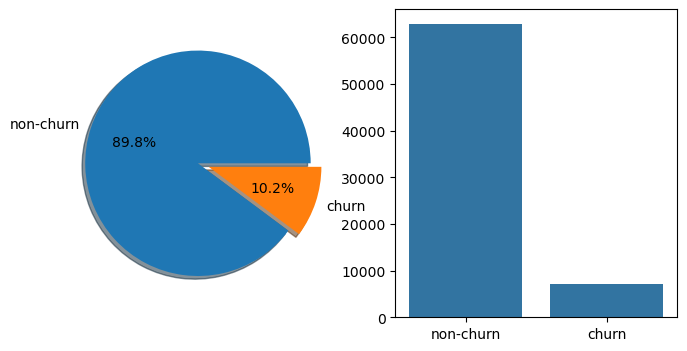

In [23]:
# Count of churn
f,ax=plt.subplots(1,2,figsize=(8,4))
train_filtered['churn_probability'].replace({0:"non-churn",1:"churn"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_filtered['churn_probability'].replace({0:"non-churn",1:"churn"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

Based on the visualization, it's evident that 91.2% of customers are non-churn, while 8.8% of customers churn. This indicates a noticeable class imbalance,

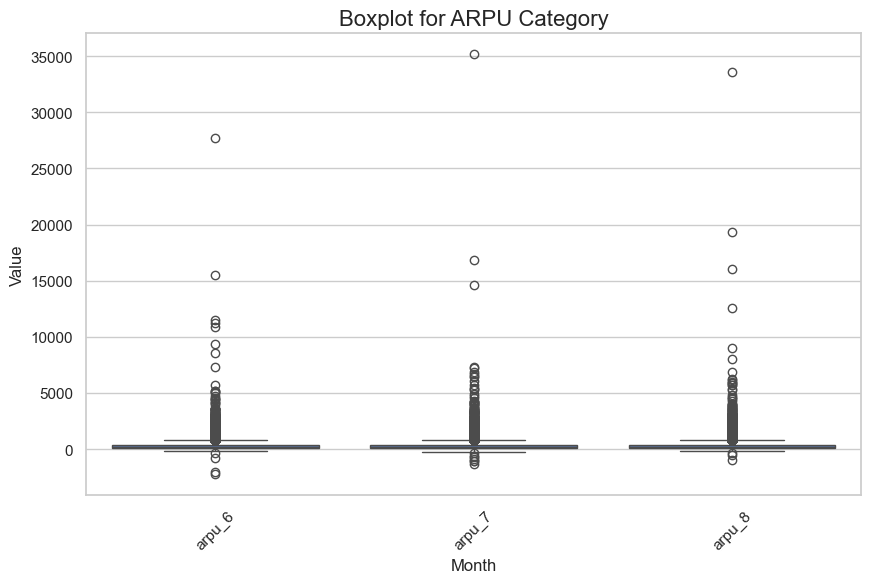

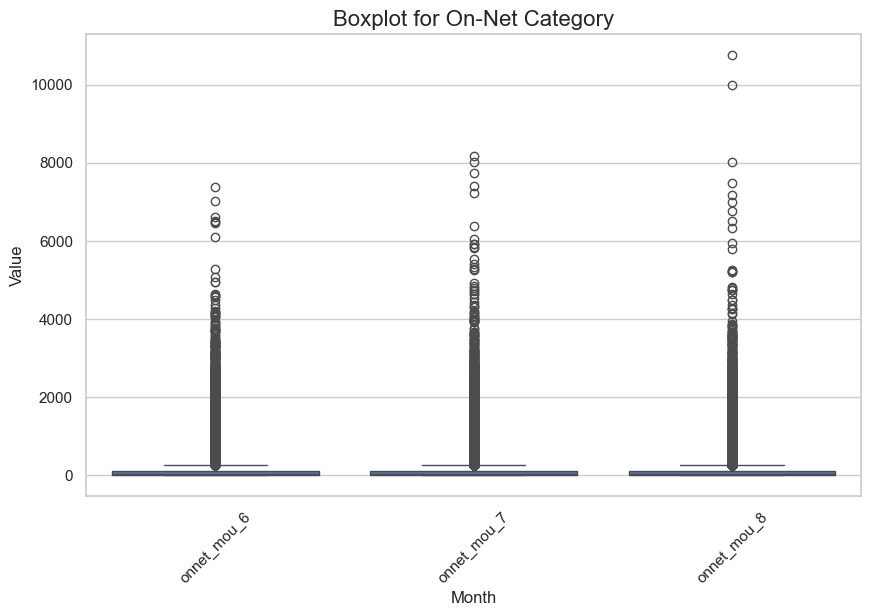

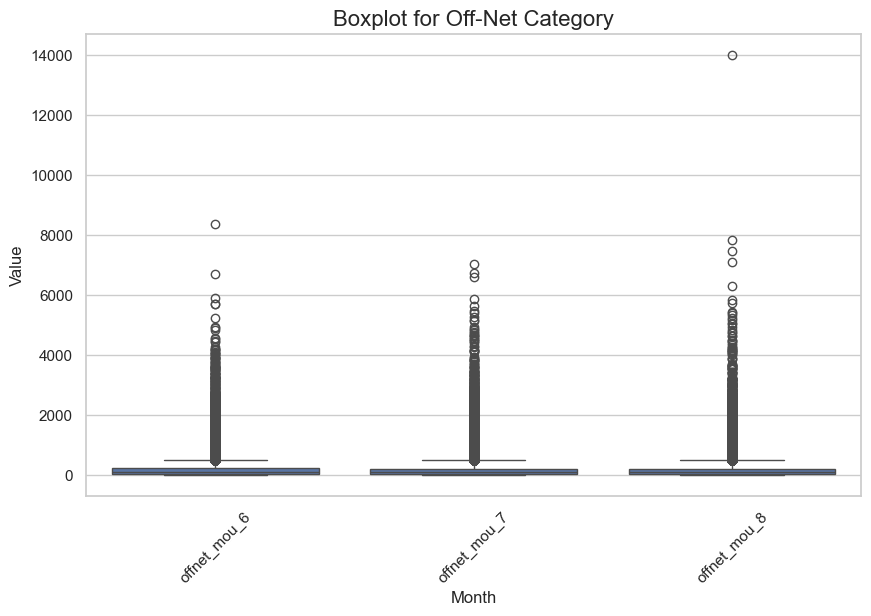

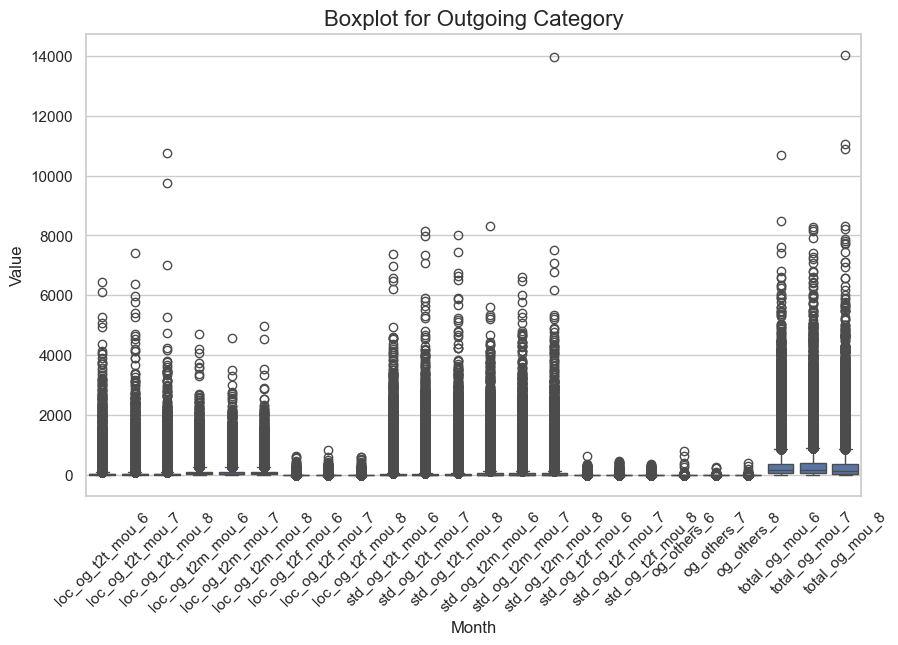

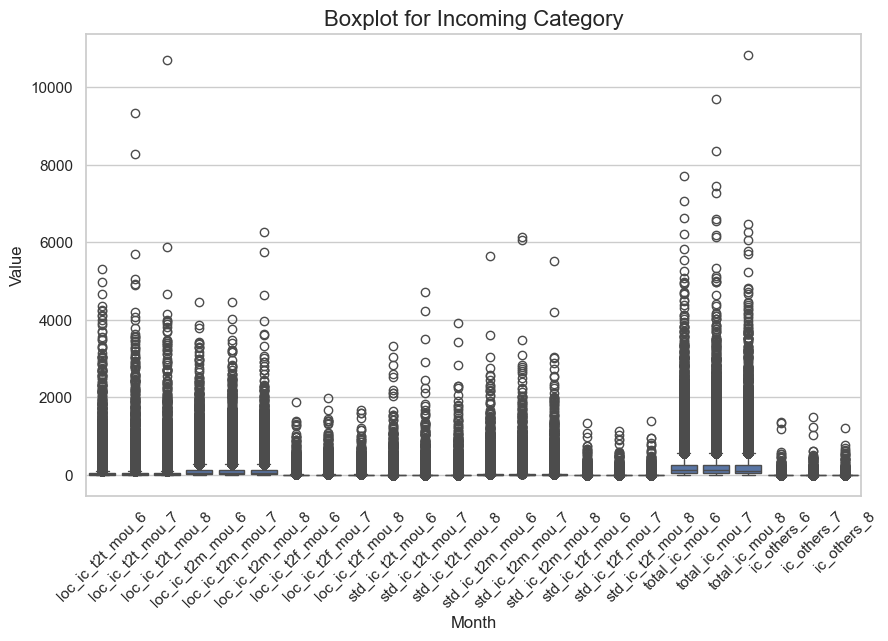

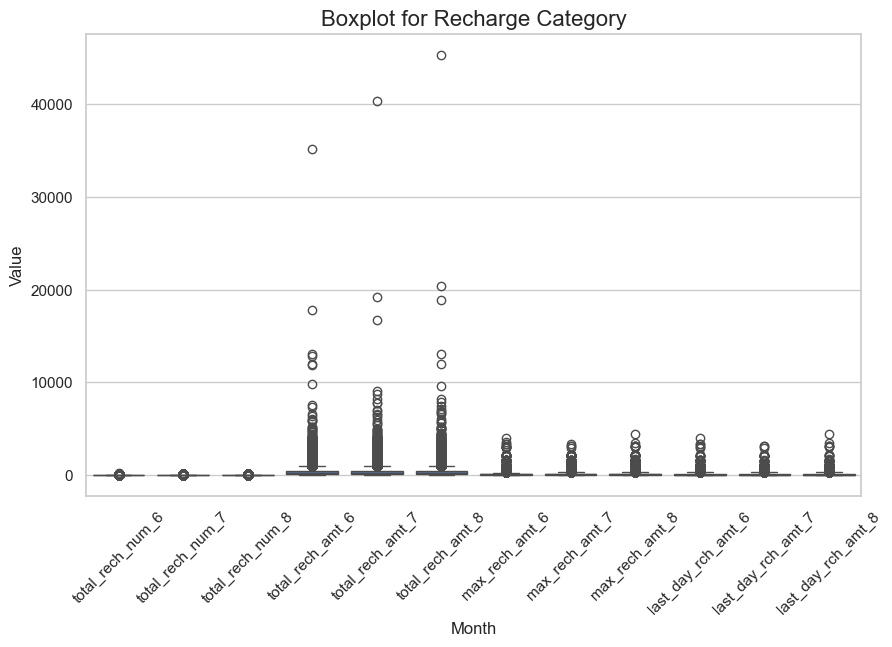

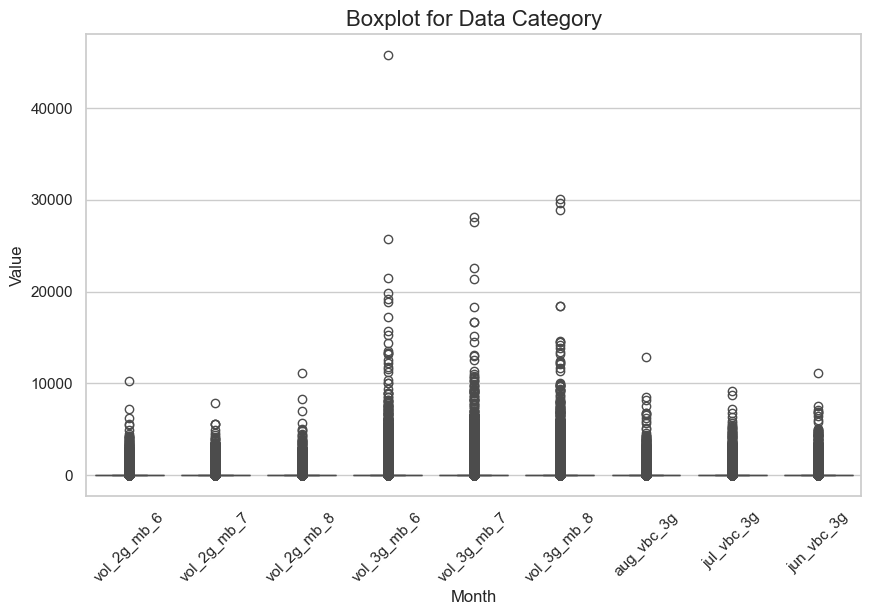

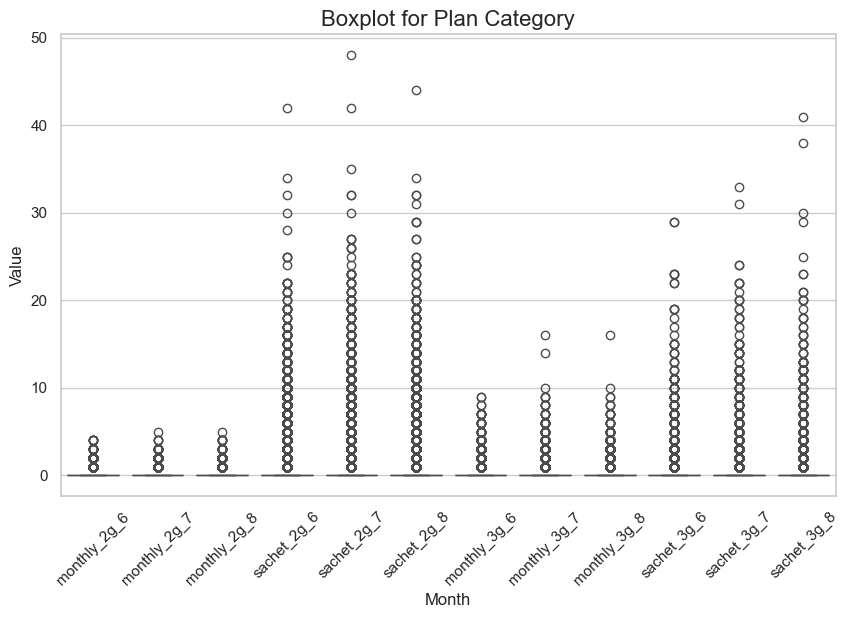

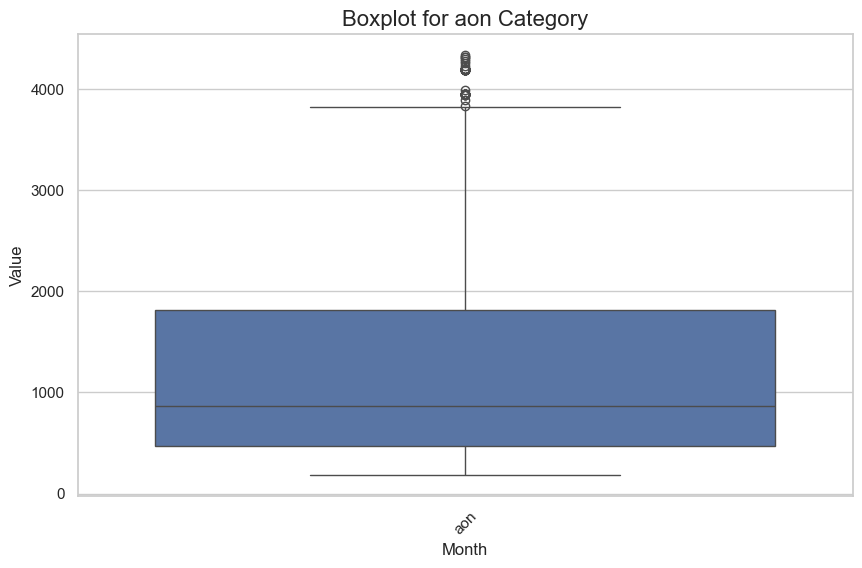

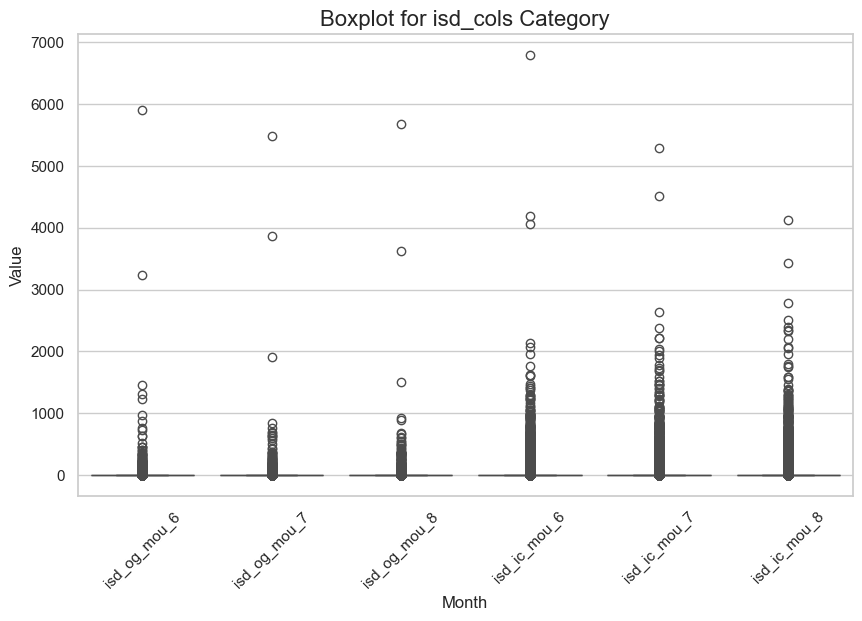

In [24]:
# Set the plot style
sns.set(style="whitegrid")

# Function to create boxplots for each category
def plot_boxplots(train_filtered, categories):
    for category, columns in categories.items():
        # Melt the data for the category into long format for easier plotting
        category_data = train_filtered[columns].melt(var_name='Month', value_name='Value')
        
        # Set up the figure
        plt.figure(figsize=(10, 6))
        
        # Create the boxplot
        sns.boxplot(x='Month', y='Value', data=category_data)
        
        # Set plot title 
        plt.title(f'Boxplot for {category} Category', fontsize=16)
       
        
        # Rotate x labels for better readability
        plt.xticks(rotation=45)
        
        # Display the plot
        plt.show()

# Call the function to plot boxplots for all categories
plot_boxplots(train_filtered, categories)

### Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [25]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

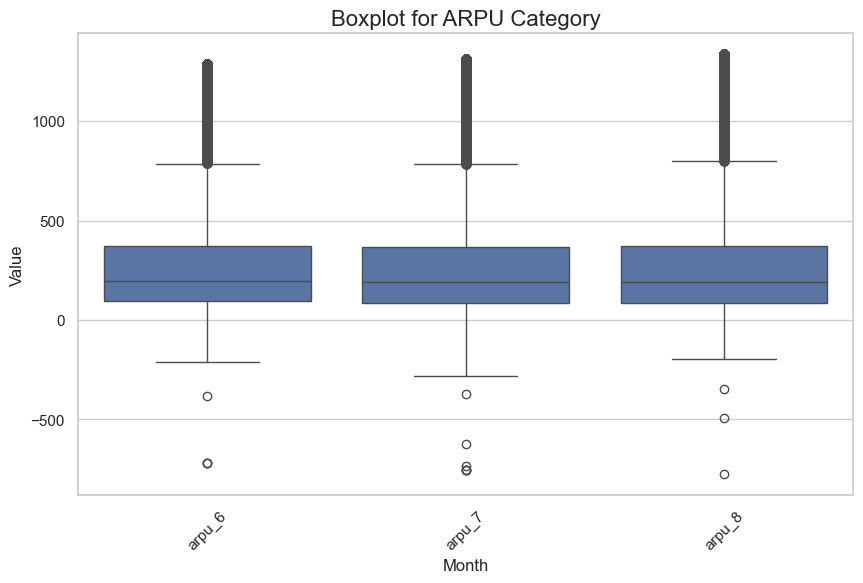

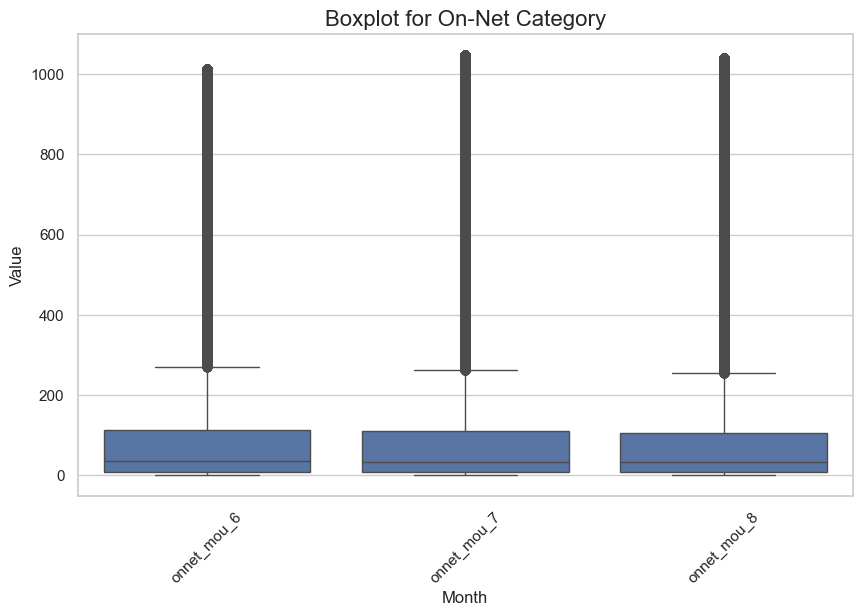

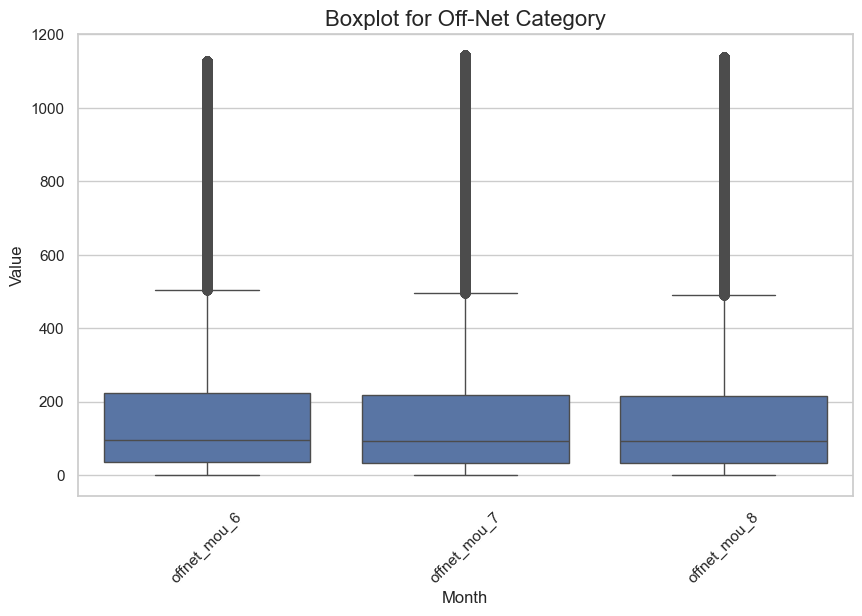

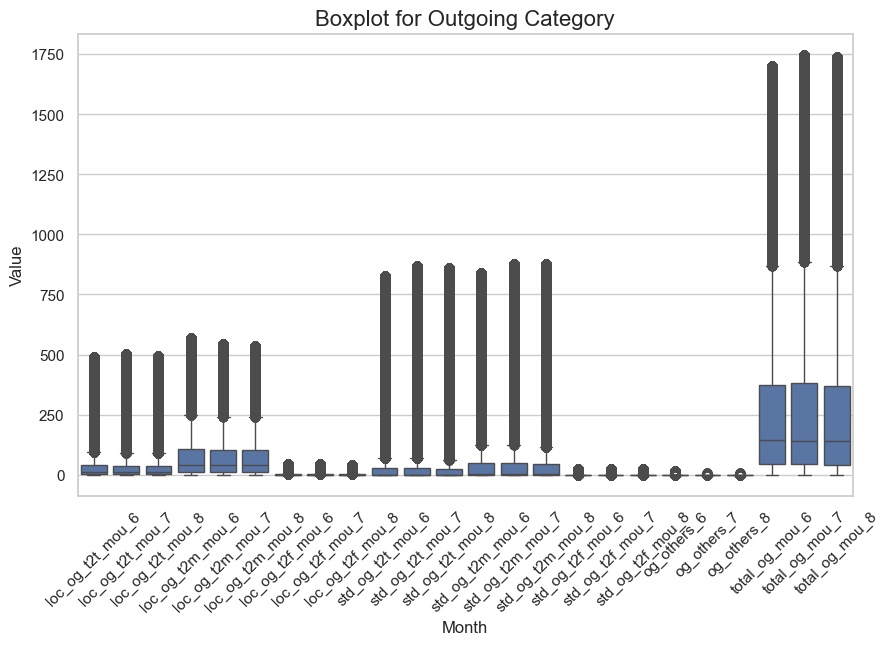

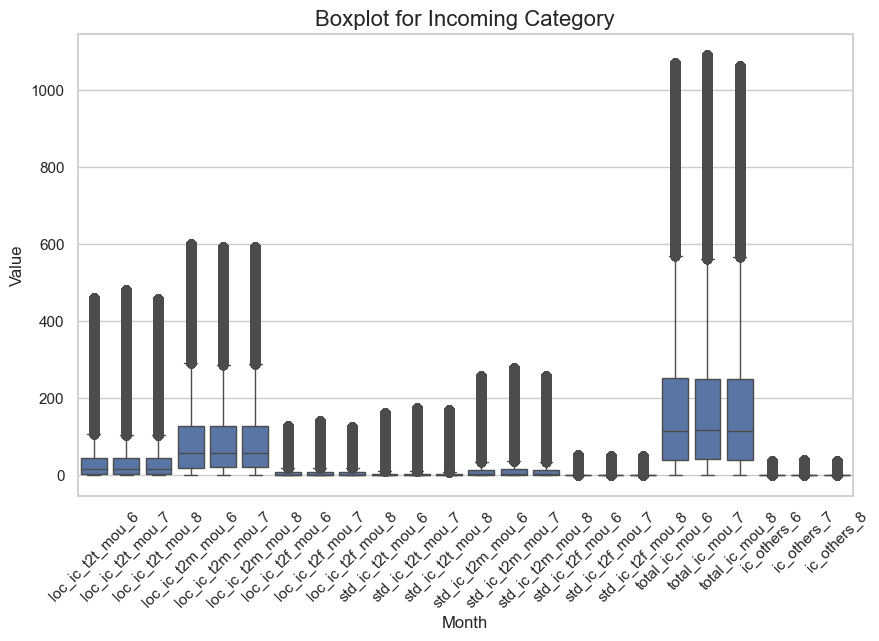

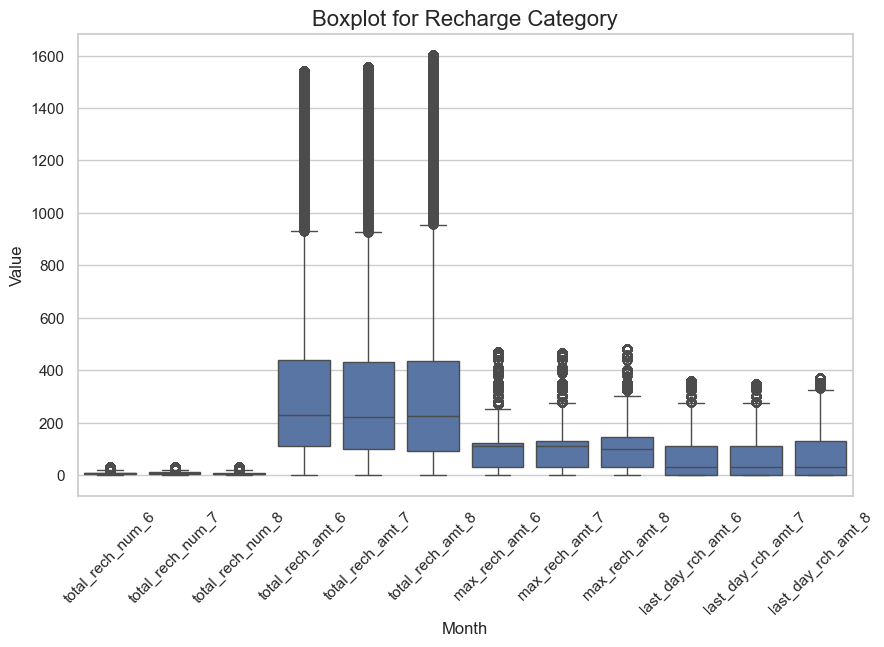

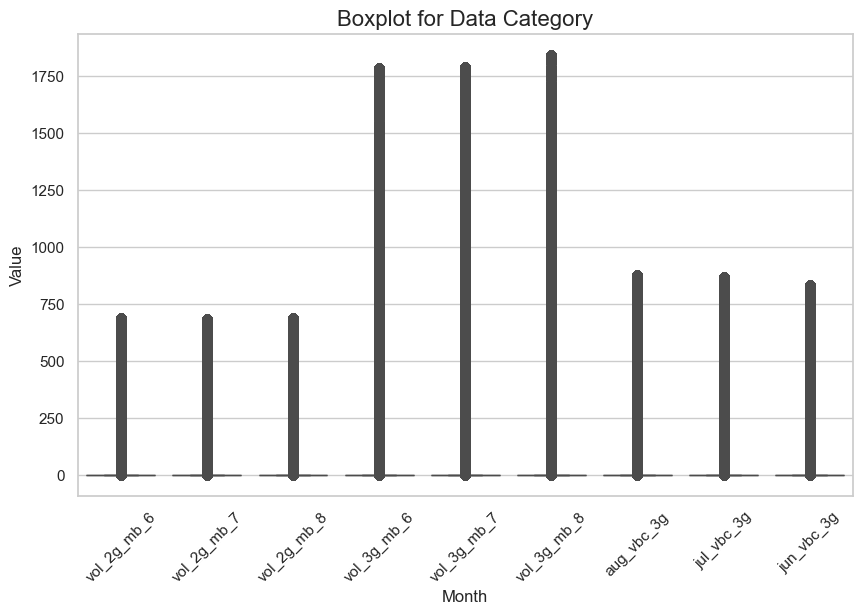

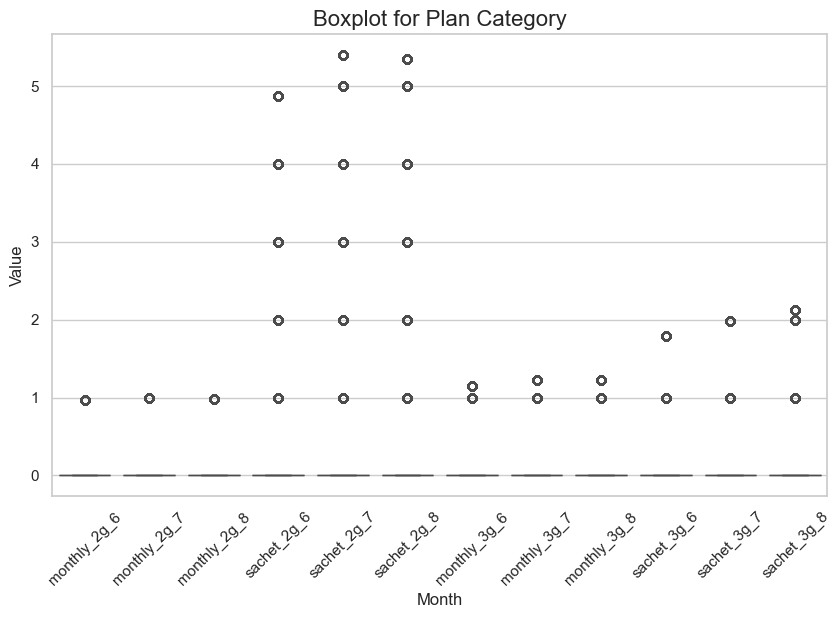

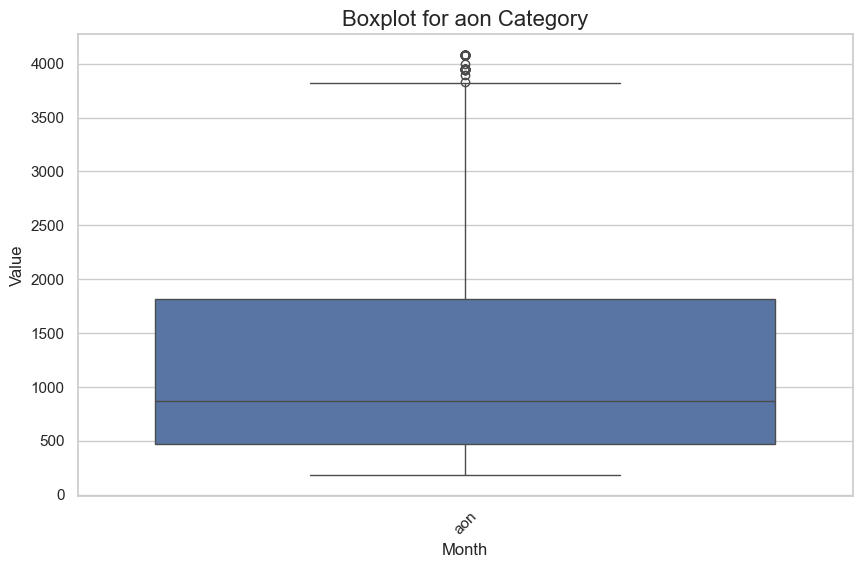

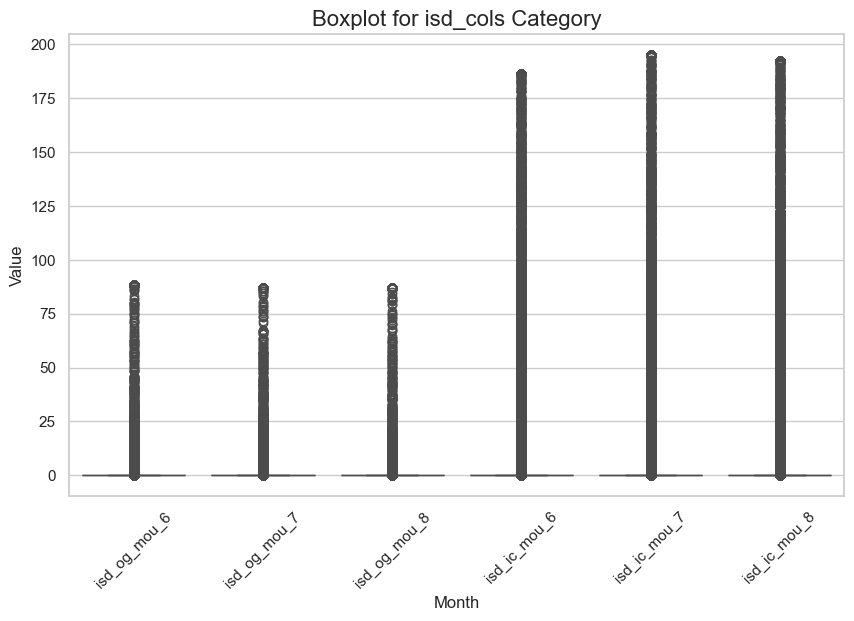

In [26]:
# Call the function to cap outliers
train_filtered = train_filtered.apply(cap_outliers, axis=0)

# Now, you can check if the outliers have been capped by plotting the boxplots again
plot_boxplots(train_filtered, categories)

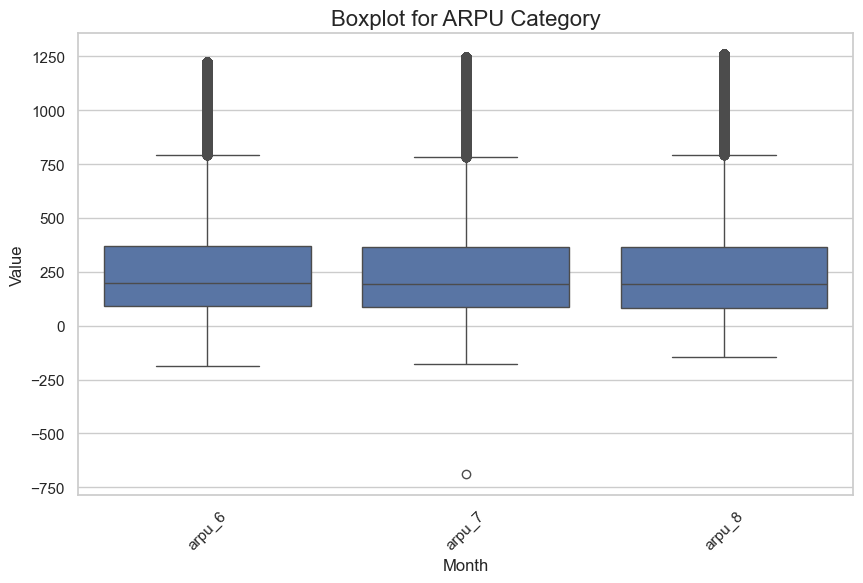

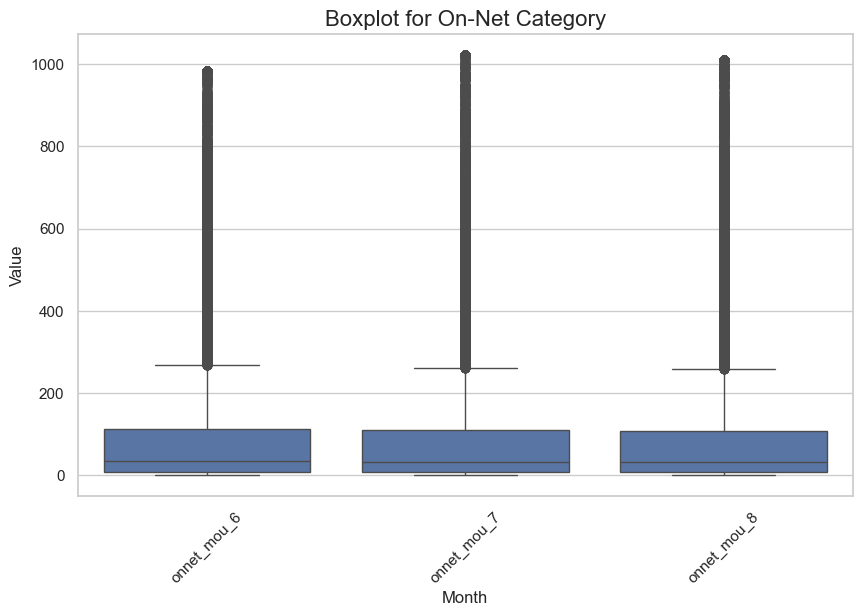

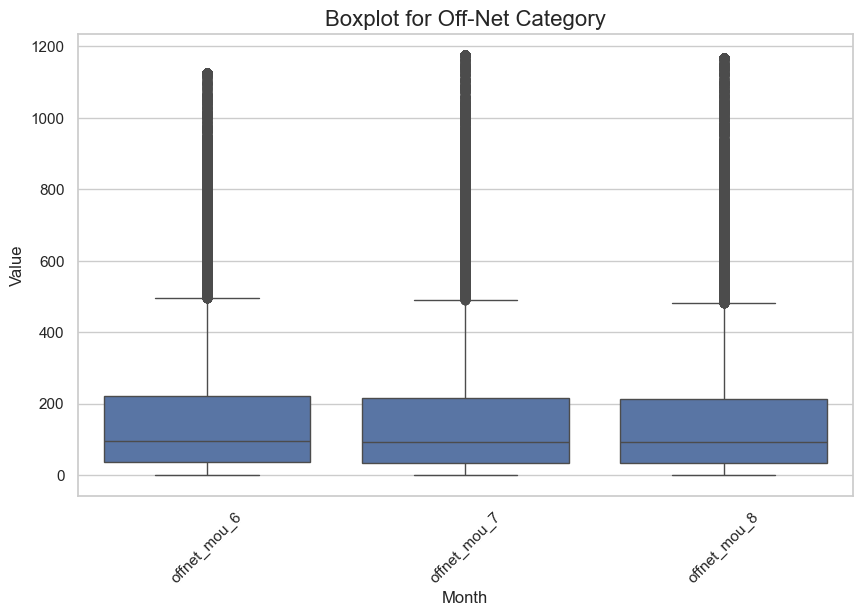

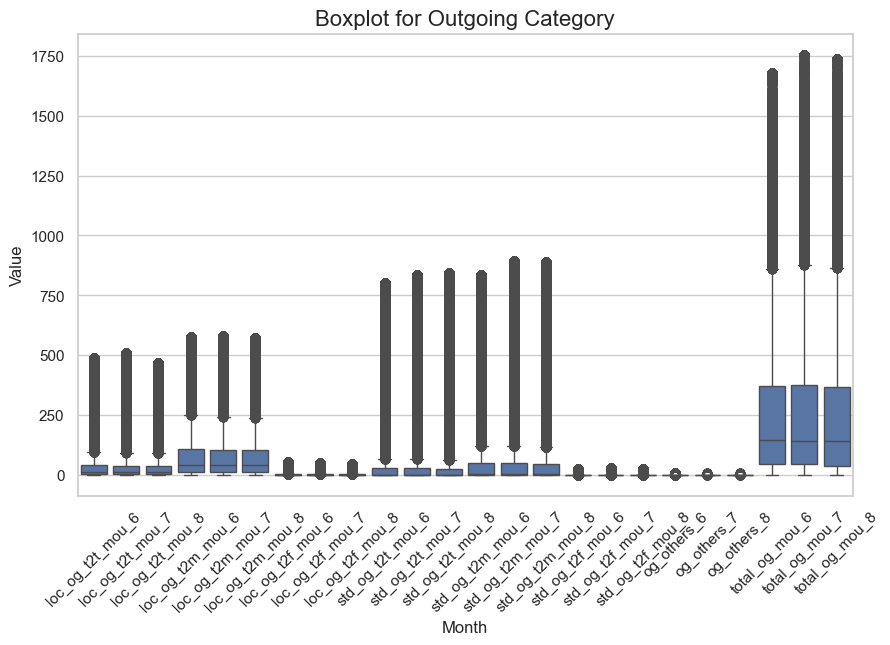

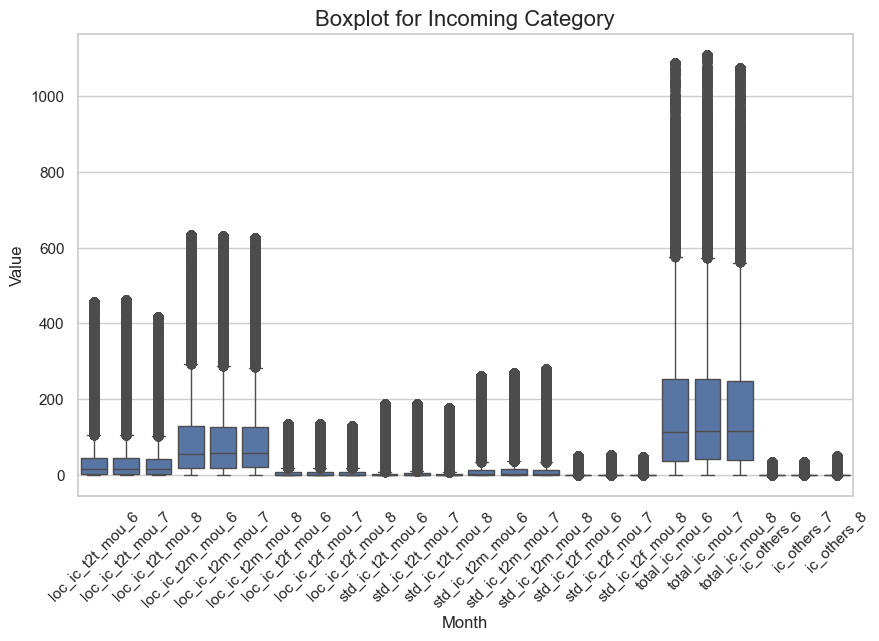

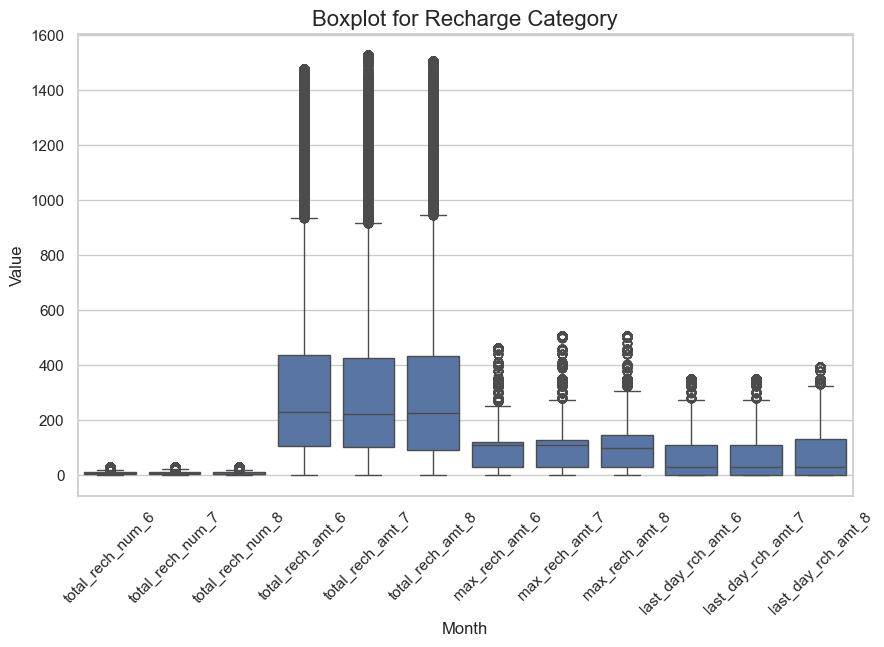

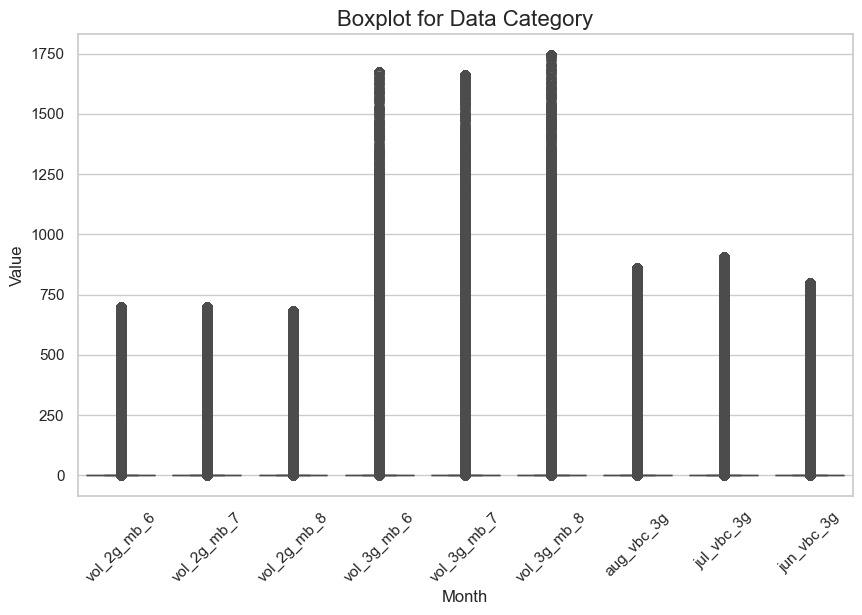

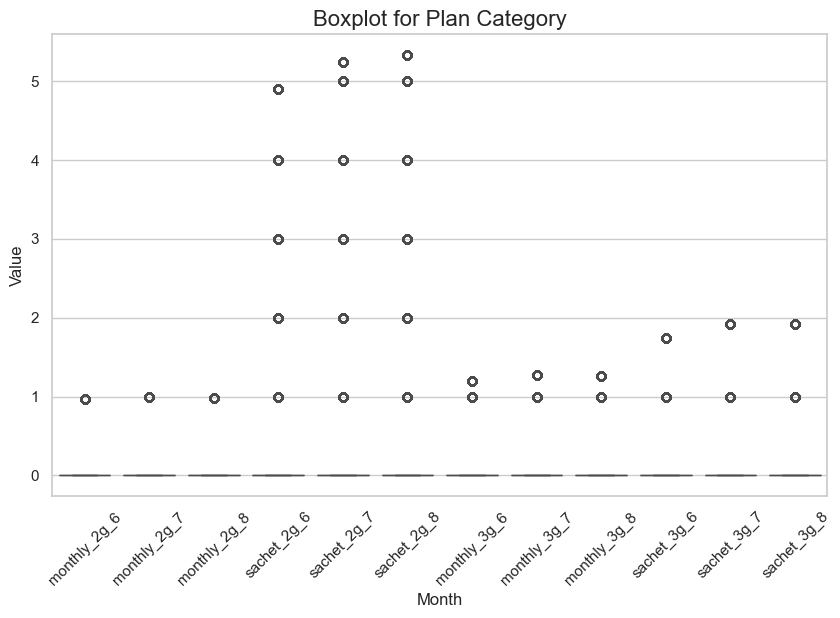

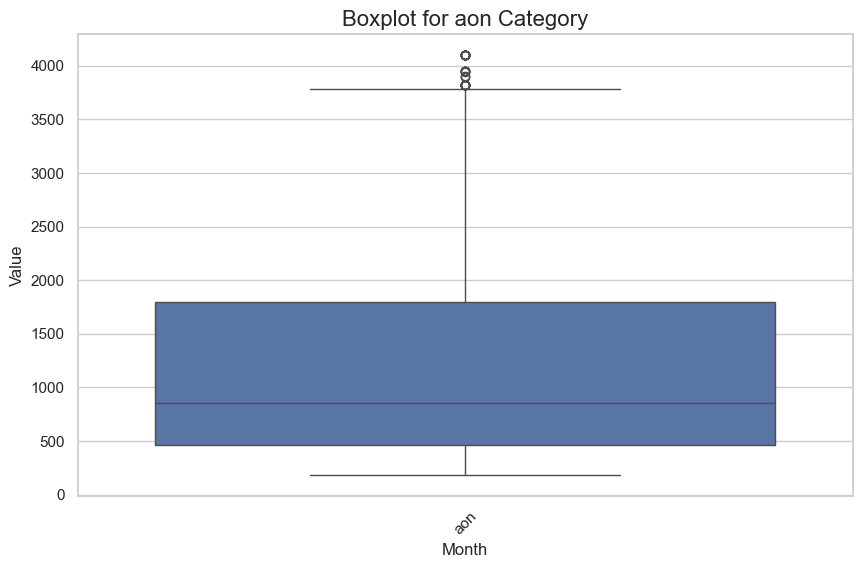

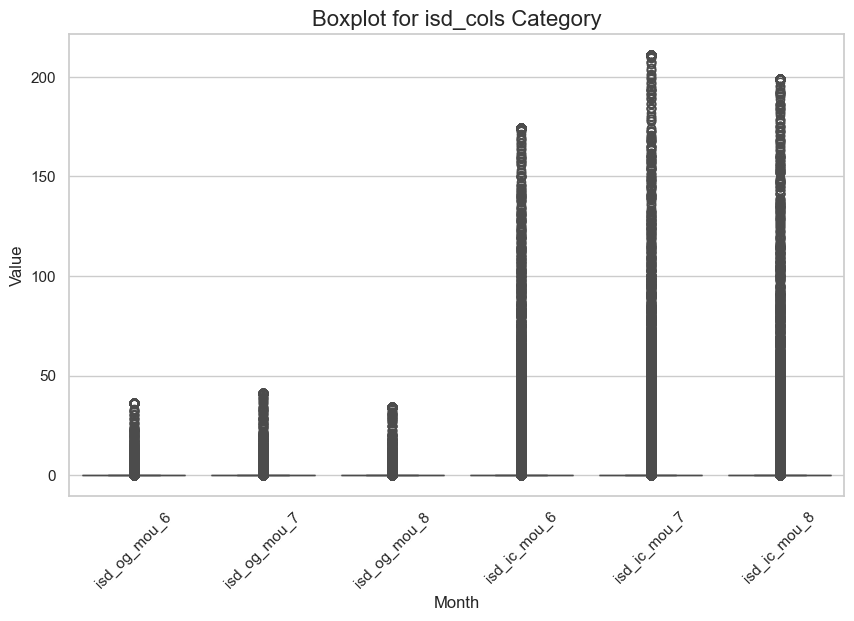

In [27]:
# Call the function to cap outliers
unseen_filtered = unseen_filtered.apply(cap_outliers, axis=0)
# Now, you can check if the outliers have been capped by plotting the boxplots again
plot_boxplots(unseen_filtered, categories)

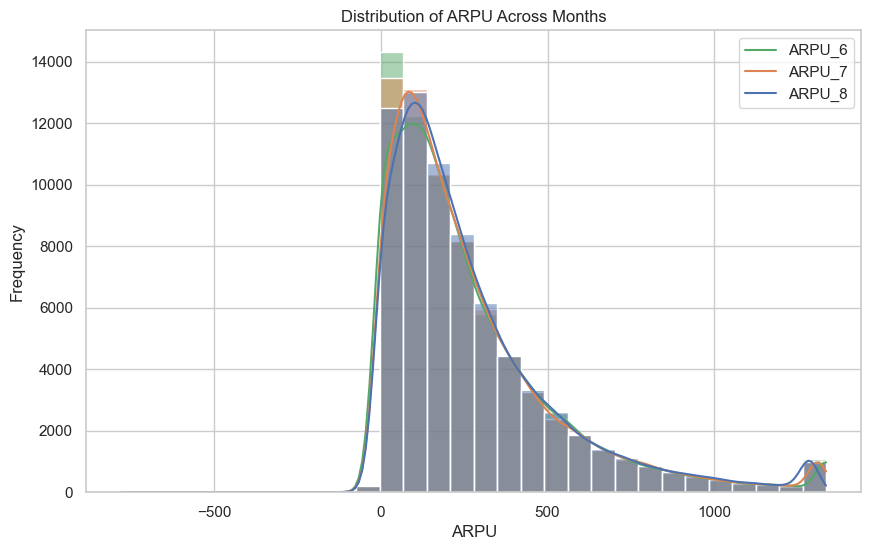

In [28]:
# Plot the distribution of ARPU over months
plt.figure(figsize=(10, 6))
sns.histplot(train_filtered[['arpu_6', 'arpu_7', 'arpu_8']], bins=30, kde=True)
plt.title("Distribution of ARPU Across Months")
plt.xlabel("ARPU")
plt.ylabel("Frequency")
plt.legend(['ARPU_6', 'ARPU_7', 'ARPU_8'])
plt.show()

The graph indicates a stable ARPU distribution across the three months, with most users generating low revenue and a few contributing significantly higher amounts. The consistency in the distribution suggests that user behavior is relatively stable over time. 

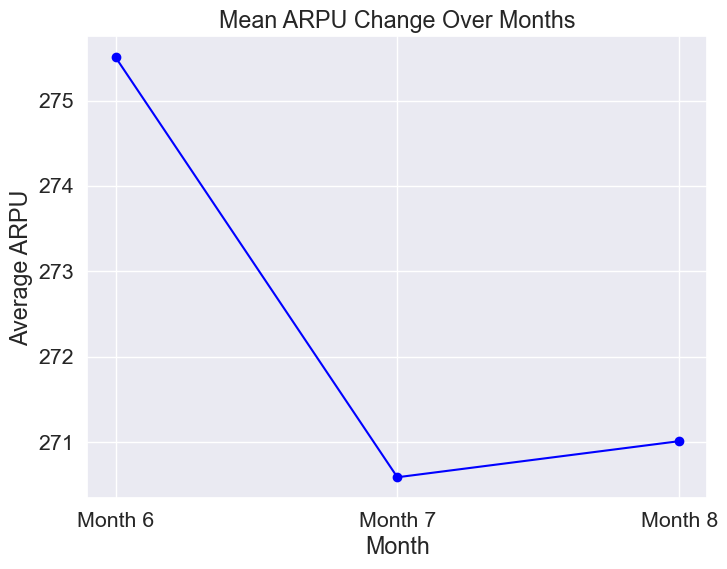

In [120]:
# Calculate mean ARPU for each month
arpu_means = train_filtered[['arpu_6', 'arpu_7', 'arpu_8']].mean()

# Plot the ARPU change over time
plt.figure(figsize=(8, 6))
arpu_means.plot(kind='line', marker='o', color='blue')
plt.title("Mean ARPU Change Over Months")
plt.xlabel("Month")
plt.ylabel("Average ARPU")
plt.xticks(ticks=[0, 1, 2], labels=['Month 6', 'Month 7', 'Month 8'])
plt.grid(True)
plt.show()

From Month 7 to Month 8, there is a noticeable drop in the Average Revenue Per User (ARPU). 

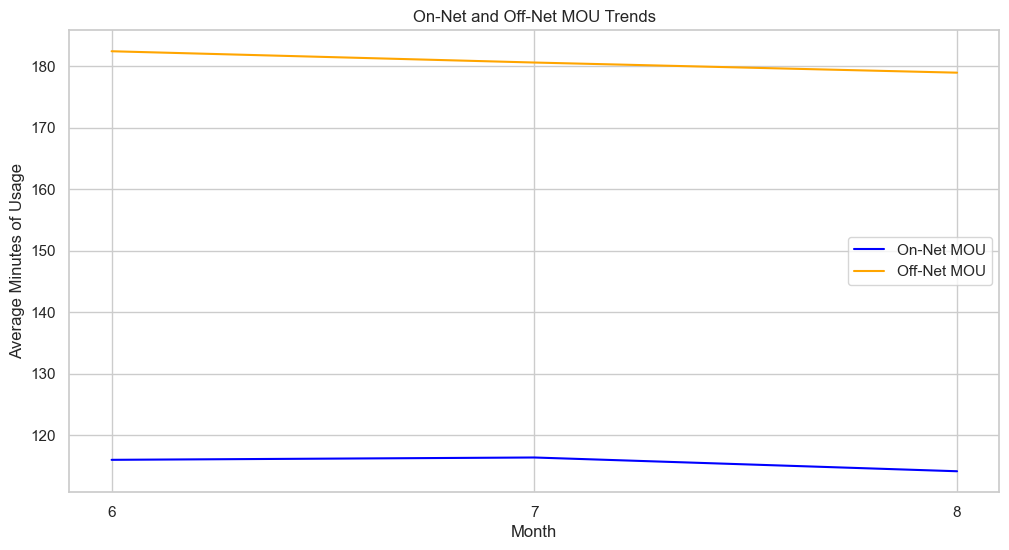

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=['6', '7', '8'], y=train_filtered[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']].mean(), label="On-Net MOU", color="blue")
sns.lineplot(x=['6', '7', '8'], y=train_filtered[['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']].mean(), label="Off-Net MOU", color="orange")
plt.title('On-Net and Off-Net MOU Trends')
plt.xlabel('Month')
plt.ylabel('Average Minutes of Usage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train[['aon', 'arpu_6', 'arpu_7', 'arpu_8', 'churn_probability']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with AON')
plt.show()

- Off-Net MOU has consistently higher values, starting above 180 minutes and showing a slight decline over the three months.
- On-Net MOU is significantly lower, remaining steady just above 120 minutes, with a slight decline as well.

In [31]:
def plot_bar_graph(title, month, y_list, data):
    """
    Plot bar graphs for given data.

    Parameters:
    - title (str): Title of the plot.
    - month (list of str): List of month names.
    - y_list (list of str): List of y-variable names corresponding to each month.
    - data (DataFrame): DataFrame containing the data to be plotted.

    Returns:
    - None

    This function plots bar graphs for each month's data based on the provided y-variables.
    It creates subplots for each month, with the corresponding y-variable plotted against 'churn_probability'.
    The title of each subplot includes the specified title along with the month name.
    """
    plt.figure(figsize=(15, 10))
    
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)
    
    plt.tight_layout()
    plt.show()

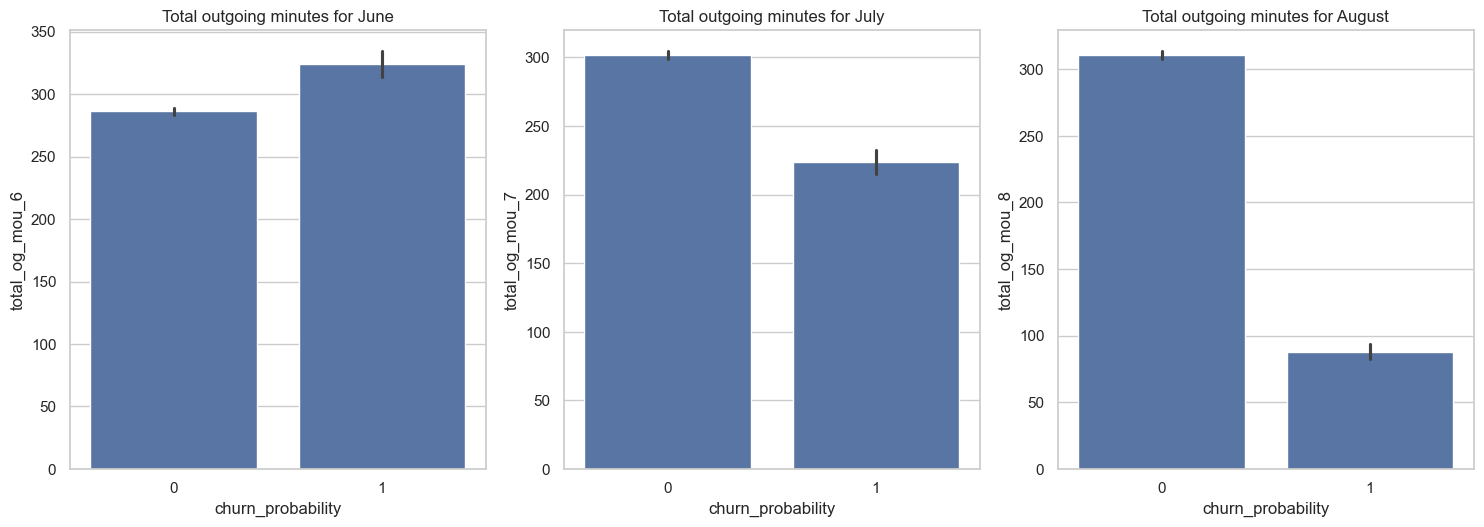

In [32]:
# Visualising Outgoing minutes of usage
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_bar_graph('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, train_filtered)

There is a clear trend showing that customers identified as having a higher probability of churn are decreasing their usage over the months

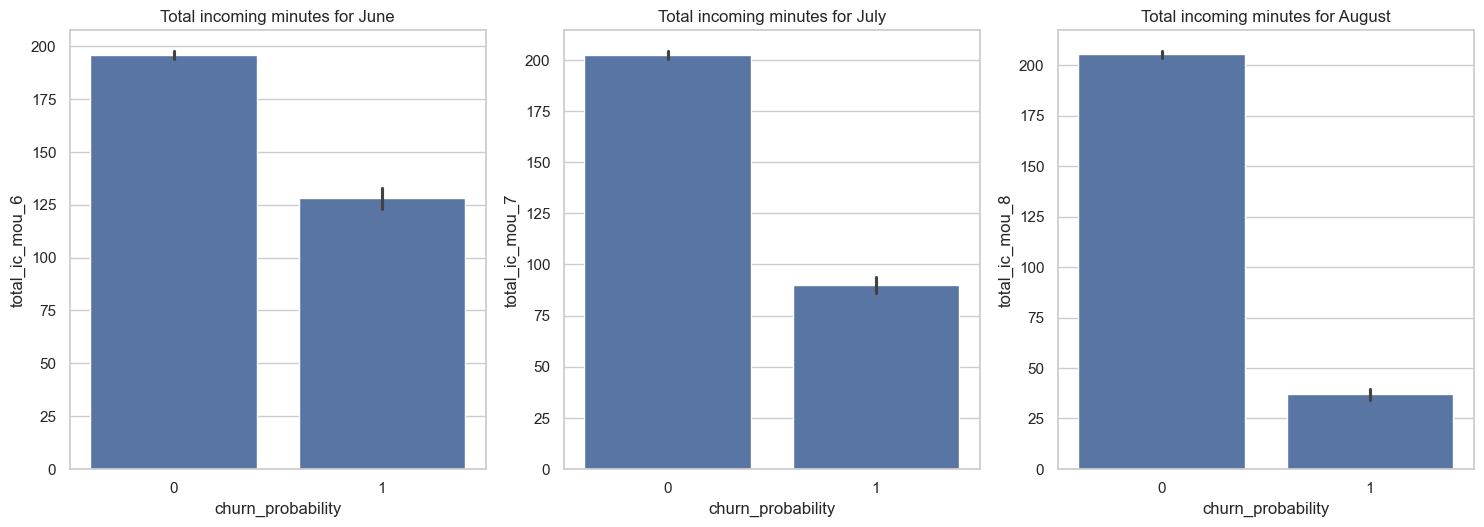

In [33]:
# Visualising incoming minutes of usage
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plot_bar_graph('Total incoming minutes', ['June', 'July', 'August'], total_ic_mou_cols, train_filtered)

There is a clear trend showing that customers identified as having a higher probability of churn are decreasing their usage over the months

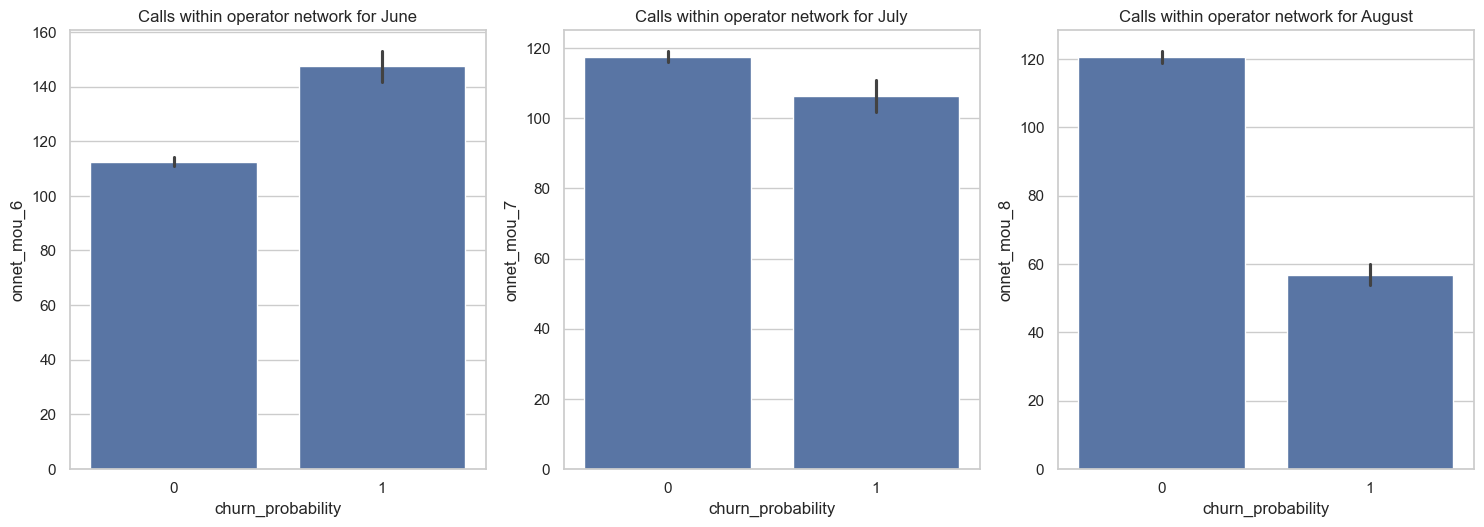

In [34]:
# Visualizing all types of calls within the operator's network.
onnet_mou_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
plot_bar_graph('Calls within operator network', ['June', 'July', 'August'], onnet_mou_cols, train_filtered)

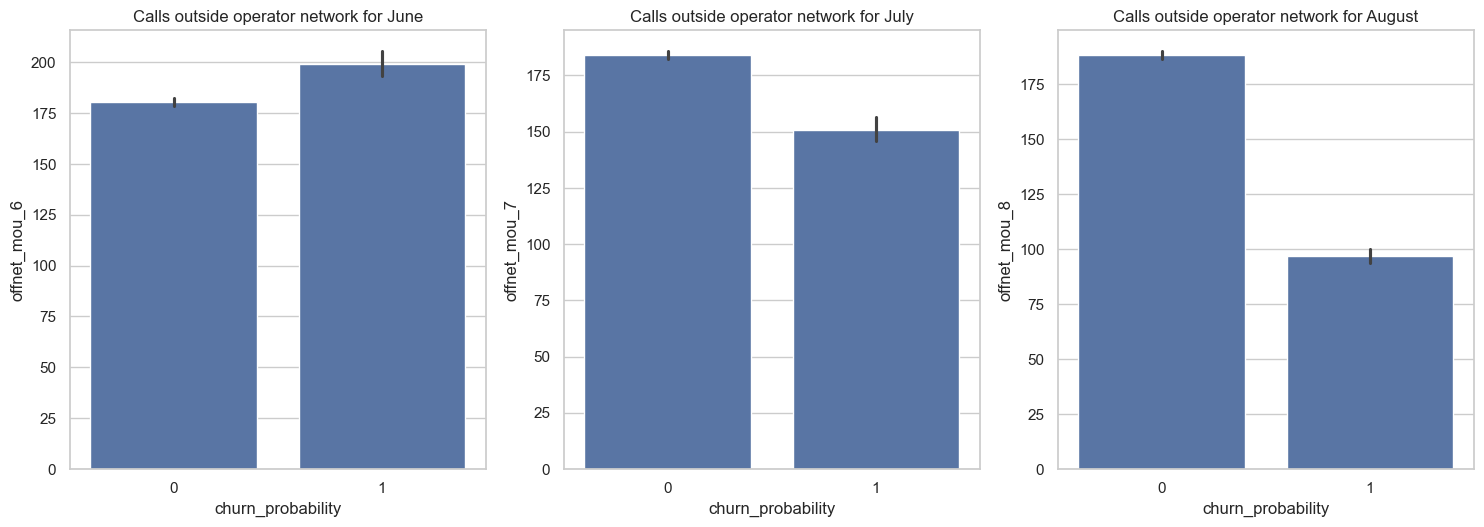

In [35]:
# Visualizing all types of calls made outside the operator network.
offnet_mou_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
plot_bar_graph('Calls outside operator network', ['June', 'July', 'August'], offnet_mou_cols, train_filtered)

There is a consistent pattern where high churn probability customers are showing reduced engagement in making off-net calls over the months. This pattern is concerning and suggests they may be on the verge of leaving the network.

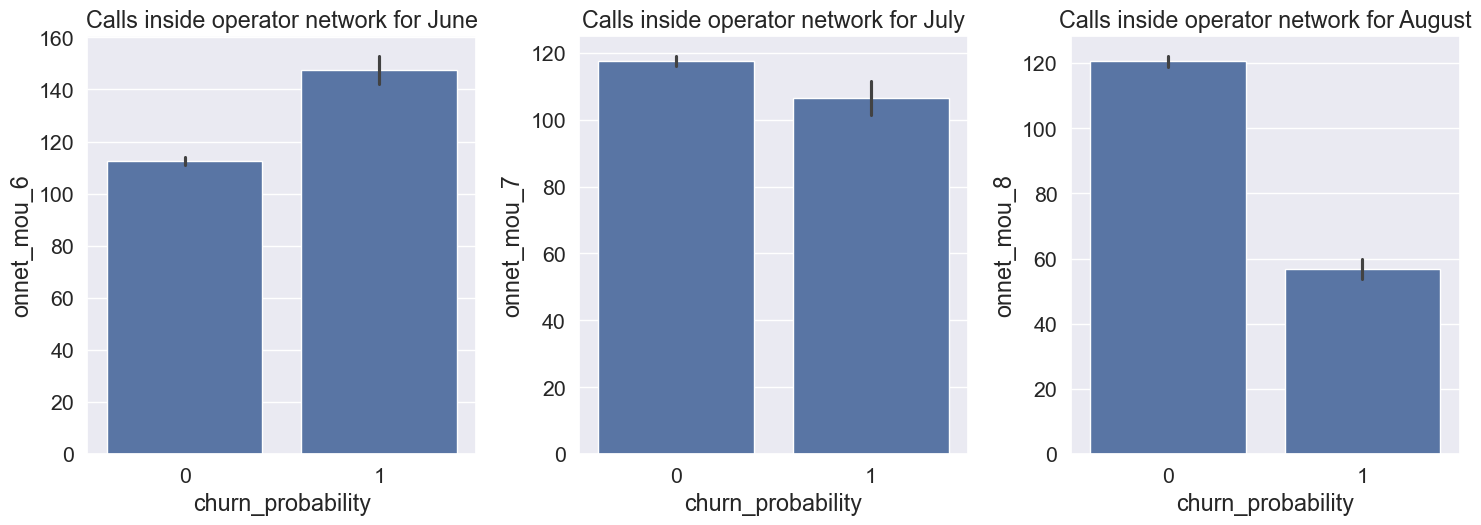

In [121]:
onnet_mou_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
plot_bar_graph('Calls inside operator network', ['June', 'July', 'August'], onnet_mou_cols, train_filtered)

There is a consistent pattern where high churn probability customers are showing reduced engagement in making on-net calls over the months. 

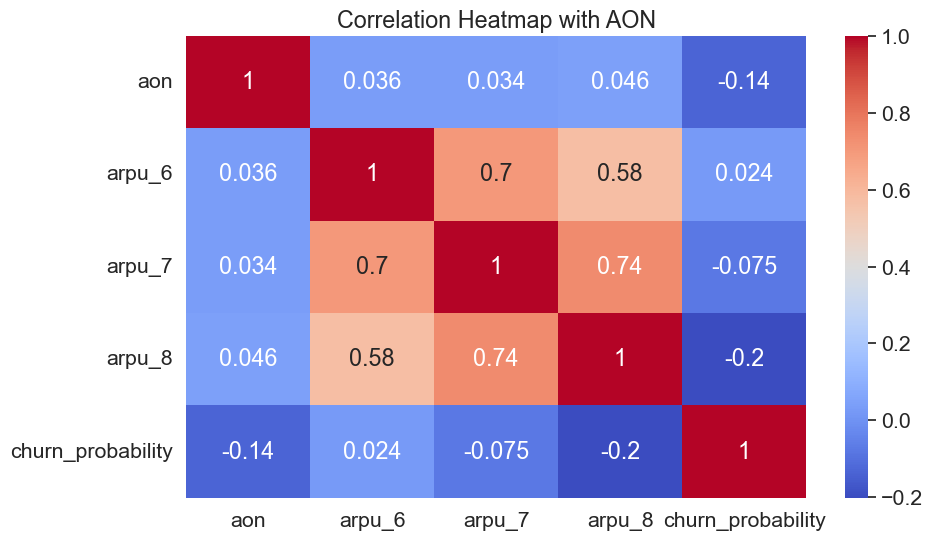

In [122]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_filtered[['aon', 'arpu_6', 'arpu_7', 'arpu_8', 'churn_probability']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with AON')
plt.show()

### Common Utility Methods

In [36]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate confusion matrix, accuracy, precision, and recall.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(cm)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision
    precision = precision_score(y_true, y_pred)
    
    # Recall (Sensitivity)
    recall = recall_score(y_true, y_pred)

    # Create a DataFrame with the results
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall'],
        'Value': [accuracy, precision, recall]
    })

    return metrics_df

In [37]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

###  Model Building and Evaluation

In [38]:
# Getting the feature variables in X and target variable `churn_probability` in y
X = train_filtered.drop('churn_probability', axis = 1)
y = train_filtered['churn_probability']

In [39]:
# Train test split - 80% training data, 20% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [40]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (55999, 116)
y_train Shape: (55999,)
X_test Shape: (14000, 116)
y_test Shape: (14000,)


In [41]:
y_train.value_counts()

churn_probability
0    50259
1     5740
Name: count, dtype: int64

In [42]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

##### Handling Data Imbalance using Synthetic Minority Over-sampling Technique (SMOTE)

In [43]:
#smt = SMOTE(random_state=2)
#X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

#### Feature Scaling using SandardScaler - Training Set

In [44]:
X_train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
59805,59805,20.000,457.270,0.000,34.11,57.21,0.00,96.48,132.28,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,778.0,0.0,0.00,0.0
32717,32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,...,0.0,0.0,0.0,0.0,0.0,0.0,1322.0,0.0,13.44,0.0
5964,5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,...,0.0,0.0,0.0,0.0,0.0,0.0,1543.0,0.0,0.00,0.0
47623,47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,...,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0,0.00,0.0
31881,31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1072.0,0.0,0.00,0.0


In [45]:
# Use SandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train = scaler.fit_transform(X_train)

# Only Transform validation set
X_test = scaler.transform(X_test)

In [51]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [46]:
unseen = scaler.transform(unseen_filtered)

In [47]:
X_train.shape

(55999, 116)

In [48]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55882
Model Family:                Binomial   Df Model:                          116
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10996.
Date:                Wed, 16 Oct 2024   Deviance:                       21991.
Time:                        00:36:35   Pearson chi2:                 3.29e+10
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2354
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9162      0.043    -91.654      0.000      -4.000      -3.832
x1            -0.0011      0.018     -0.061      0.952      -0.036       0.034
x2             0.1787      0.072      2.497      0.013       0.038       0.319
x3             0.3447      0.078      4.446      0.000       0.193       0.497
x4             0.3095      0.084      3.699      0.000       0.146       0.474
x5            -0.0729      0.108     -0.674      0.500      -0.285       0.139
x6             0.1607      0.122      1.316      0.188      -0.079       0.400
x7            -0.0144      0.136     -0.106      0.916      -0.281       0.252
x8             0.1394      0.101      1.380      0.168      -0.059       0.337
x9             0.3319      0.119      2.785      0.005       0.098       0.566
x10           -0.3631      0.126     -2.888      0.004      -0.609      -0.117
x11            0.0047      0.029      0.164      0.870      -0.051       0.061
x12            0.0491      0.027      1.841      0.066      -0.003       0.101
x13            0.0085      0.024      0.353      0.724      -0.038       0.055
x14            0.0672      0.030      2.250      0.024       0.009       0.126
x15            0.0076      0.027      0.283      0.777      -0.045       0.060
x16            0.2320      0.026      9.058      0.000       0.182       0.282
x17           -0.1855      0.106     -1.746      0.081      -0.394       0.023
x18            0.1391      0.123      1.127      0.260      -0.103       0.381
x19           -0.8732      0.161     -5.434      0.000      -1.188      -0.558
x20           -0.3685      0.150     -2.461      0.014      -0.662      -0.075
x21           -0.2242      0.171     -1.312      0.190      -0.559       0.111
x22           -0.7469      0.214     -3.483      0.000      -1.167      -0.327
x23           -0.0740      0.038     -1.953      0.051      -0.148       0.000
x24            0.0332      0.043      0.776      0.438      -0.051       0.117
x25           -0.0438      0.049     -0.903      0.367      -0.139       0.051
x26            0.6069      0.227      2.672      0.008       0.162       1.052
x27            0.0498      0.255      0.195      0.845      -0.449       0.549
x28            1.9068      0.303      6.301      0.000       1.314       2.500
x29            0.1477      0.100      1.473      0.141      -0.049       0.344
x30           -0.0503      0.117     -0.430      0.668      -0.280       0.179
x31           -0.7258      0.145     -4.997      0.000      -1.010      -0.441
x32           -0.0614      0.088     -0.701      0.483      -0.233       0.110
x33           -0.1117      0.108     -1.033      0.301      -0.324       0.100
x34           -0.4449      0.134     -3.326      0.001      -0.707      -0.183
x35           -0.0565      0.029     -1.919      0.055      -0.114       0.001
x3

### Model 1. Logistic Regression with Recursive Feature Elimination (RFE)

In [52]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 96),
 ('arpu_6', False, 24),
 ('arpu_7', False, 8),
 ('arpu_8', False, 16),
 ('onnet_mou_6', False, 57),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 87),
 ('offnet_mou_6', False, 52),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 10),
 ('roam_ic_mou_6', False, 89),
 ('roam_ic_mou_7', False, 58),
 ('roam_ic_mou_8', False, 90),
 ('roam_og_mou_6', False, 36),
 ('roam_og_mou_7', False, 94),
 ('roam_og_mou_8', False, 7),
 ('loc_og_t2t_mou_6', False, 26),
 ('loc_og_t2t_mou_7', False, 39),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 25),
 ('loc_og_t2m_mou_7', False, 15),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 41),
 ('loc_og_t2f_mou_7', False, 68),
 ('loc_og_t2f_mou_8', False, 67),
 ('loc_og_mou_6', False, 21),
 ('loc_og_mou_7', False, 17),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 51),
 ('std_og_t2t_mou_7', False, 83),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 66),
 ('std_og_t2m_mou_7', False

In [54]:
# Selected features using RFE
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'vol_3g_mb_8'],
      dtype='object')

In [55]:
X_train_final = X_train[selected_features]
logreg.fit(X_train_final, y_train)

LogisticRegression()

In [56]:
y_train_pred = logreg.predict(X_train_final)

In [57]:
# Calculate metrics on the training set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix:
[[49567   692]
 [ 3250  2490]]


,Metric,Value
0,Accuracy,0.929606
1,Precision,0.782527
2,Recall,0.433798


In [58]:
# Retain only the selected feature from the final model
X_test_final = X_test[selected_features]
X_test_final.head()

,onnet_mou_7,offnet_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8
0,1.902099,2.681364,-0.504329,-0.729143,-0.729752,-0.385114,-0.426036,-0.496678,2.722072,-0.746522,-0.571230,-0.807768,-0.432732,-0.839252,-0.475263,-0.829521,-0.127199,-0.763978,-0.308775,-0.323456
1,0.772540,0.923449,-0.504329,-0.729143,-0.729752,-0.385114,-0.426036,-0.496678,0.532171,-0.750599,-0.571230,-0.819334,-0.432732,-0.846948,-0.475263,-0.846334,-0.223814,-0.763978,-0.308697,-0.323456
2,-0.416118,-0.746748,-0.504329,-0.729143,-0.729752,-0.385114,-0.426036,-0.496678,-0.757125,-0.750599,-0.571230,-0.819334,-0.432732,-0.846948,-0.475263,-0.846334,-0.223814,-0.763978,-0.308775,-0.323456
3,-0.544190,-0.749786,-0.504329,-0.729143,-0.729752,-0.385114,-0.426036,-0.496678,-0.725403,-0.750599,-0.565831,-0.738040,-0.298548,-0.774495,-0.475263,-0.786927,-0.223814,0.504523,-0.062379,0.559049
4,-0.402718,-0.026770,-0.467785,-0.706088,-0.699000,-0.292831,-0.288372,-0.364625,-0.230034,-0.632631,-0.410958,-0.801489,-0.432732,-0.773066,-0.274083,-0.733920,-0.223814,-0.763978,-0.308775,-0.323456


In [59]:
# Get the predicted values from the linear model
y_test_pred = logreg.predict(X_test_final)

In [60]:
confusion = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(confusion)

[[12455   153]
 [  776   616]]


In [61]:
# Calculate metrics
metrics_df = calculate_classification_metrics(y_true=y_test, y_pred=y_test_pred)
metrics_df

Confusion Matrix:
[[12455   153]
 [  776   616]]


,Metric,Value
0,Accuracy,0.933643
1,Precision,0.801040
2,Recall,0.442529


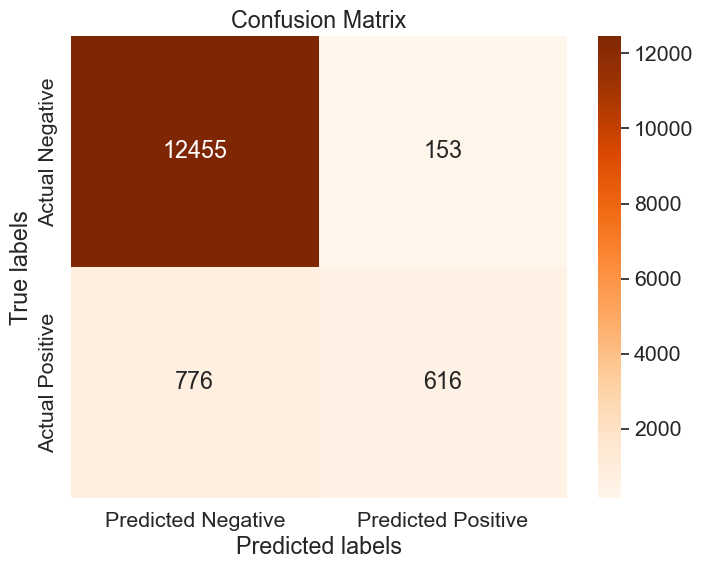

In [62]:
# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix into a 2x2 array
cm_array = np.array(confusion).reshape(2,2)

# Create the heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True, cmap='Oranges', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

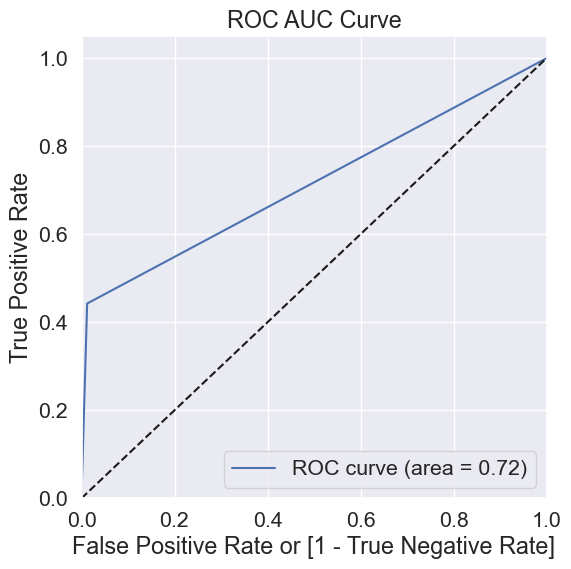

In [63]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

In [64]:
# ROC AUC Score
"{:2.2f}".format(roc_auc_score(y_test, y_test_pred))

'0.72'

### Random Forest

In [125]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [126]:
rf.oob_score_

0.923873640600725

In [127]:
### Hyper-parameter tuning for the Random Forest

In [128]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [129]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [130]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [131]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 10 s
Wall time: 8min 51s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [133]:
grid_search.best_score_

0.9412132563040216

In [134]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

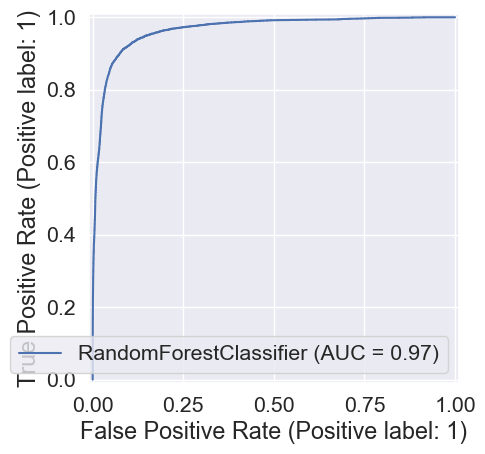

In [135]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)


plt.show()

In [136]:
rf_best.feature_importances_

array([2.91547602e-03, 3.73886610e-03, 6.23854734e-03, 7.31911334e-02,
       4.25704625e-03, 3.87813663e-03, 1.62398935e-02, 2.65310550e-03,
       2.98836379e-03, 1.64674547e-02, 1.20410696e-03, 2.97276919e-03,
       1.72595122e-02, 1.37412305e-03, 6.92849178e-03, 2.10399514e-02,
       1.46901538e-03, 2.45580723e-03, 1.19454460e-02, 2.14347652e-03,
       2.84239099e-03, 4.70322681e-02, 1.47350075e-03, 2.89533325e-03,
       7.23606866e-04, 1.99249269e-03, 3.00197763e-03, 1.86193798e-02,
       2.06890050e-03, 2.85821968e-03, 3.76826758e-03, 2.81555431e-03,
       4.13813960e-03, 9.35707684e-03, 3.52333170e-04, 1.82619843e-04,
       1.06479204e-04, 2.50783726e-03, 7.79017362e-03, 6.51390861e-03,
       2.47200955e-04, 1.09260852e-03, 6.39600457e-04, 7.86827727e-04,
       0.00000000e+00, 5.78393447e-06, 3.77707384e-03, 5.55793860e-03,
       1.63314265e-01, 2.90263786e-03, 4.07319384e-03, 2.60740565e-02,
       3.73700291e-03, 2.78974838e-03, 1.87422350e-02, 1.39811839e-03,
      

In [137]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [138]:
top_30_features = imp_df.sort_values(by="Imp", ascending=False).head(30)

# Print the top 30 features
print(top_30_features)

               Varname       Imp
48      total_og_mou_8  0.163314
90      max_rech_amt_8  0.081923
3               arpu_8  0.073191
75      total_ic_mou_8  0.063540
21    loc_og_t2m_mou_8  0.047032
60        loc_ic_mou_8  0.035198
87    total_rech_amt_8  0.034424
93  last_day_rch_amt_8  0.030146
51    loc_ic_t2t_mou_8  0.026074
84    total_rech_num_8  0.025777
66    std_ic_t2m_mou_8  0.024346
15       roam_og_mou_8  0.021040
54    loc_ic_t2m_mou_8  0.018742
27        loc_og_mou_8  0.018619
12       roam_ic_mou_8  0.017260
72        std_ic_mou_8  0.016811
9         offnet_mou_8  0.016467
6          onnet_mou_8  0.016240
57    loc_ic_t2f_mou_8  0.013103
18    loc_og_t2t_mou_8  0.011945
74      total_ic_mou_7  0.011748
33    std_og_t2m_mou_8  0.009357
63    std_ic_t2t_mou_8  0.007947
38        std_og_mou_7  0.007790
59        loc_ic_mou_7  0.007355
14       roam_og_mou_7  0.006928
96         vol_2g_mb_8  0.006635
39        std_og_mou_8  0.006514
2               arpu_7  0.006239
99        

### Model 2. Logistic Regression with PCA and Hyperparameter Tuning

In [65]:
pca = PCA()

In [66]:
pca_components = pca.fit_transform(X_train)
pca_components

array([[-4.37235365e+00, -3.18344130e-01, -1.08722212e+00, ...,
        -6.18492421e-02,  6.69428997e-02, -1.29344900e-02],
       [ 3.94119322e+00, -4.64442587e+00, -3.97515568e+00, ...,
        -1.41031366e-01, -4.10494513e-02,  8.29289909e-03],
       [ 1.13724643e+00, -1.18859028e+00,  4.98017680e+00, ...,
         3.11616627e-02, -3.91838676e-03, -6.16188793e-03],
       ...,
       [-1.96217498e+00, -1.11164578e+00, -1.66119573e-01, ...,
        -1.24735228e-02, -2.34455202e-03,  1.73394214e-03],
       [-5.61268937e-01, -5.22357869e-01,  6.33757578e+00, ...,
        -1.07958493e-02,  7.47261298e-03, -4.65133123e-03],
       [ 1.33017229e+01, -6.97427946e+00,  2.40662257e-01, ...,
         1.46148923e-01,  8.12013887e-02, -8.98535380e-02]])

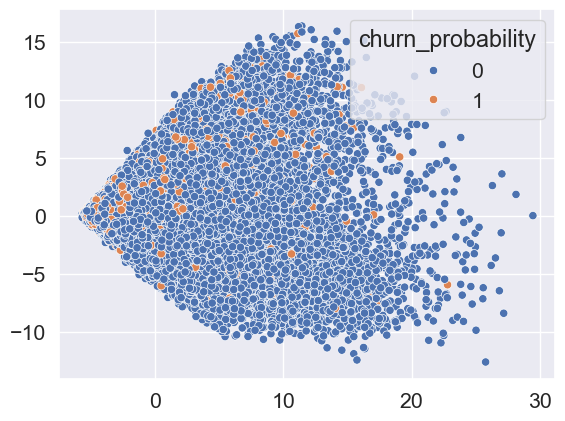

In [67]:
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

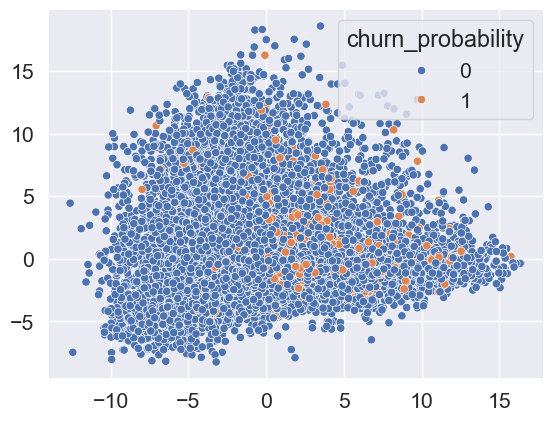

In [68]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [69]:
#X = high_val_train.copy().drop(['churn_probability'], axis=1)
#y = high_val_train.copy()['churn_probability']

In [70]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [71]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
pca = PCA(n_components=5)
lr = LogisticRegression(max_iter=1000, tol=0.001, random_state=42)

In [72]:
#smote = SMOTE(random_state=2)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [73]:
pipe = make_pipeline(
    imputer,
    scaler,
    pca,
    lr
)

In [74]:
# Define hyperparameters grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.1, 1.0, 10],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear']  # liblinear is needed for L1 penalty
}

In [75]:
# Instantiate GridSearchCV
lr_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [76]:
# Fit the model using GridSearchCV
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
lr_best_params = lr_grid_search.best_params_
lr_best_estimator = lr_grid_search.best_estimator_
print("Best parameters found:", lr_best_params)

Best parameters found: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [77]:
# Predict values on the training set
y_train_pred = lr_grid_search.predict(X_train)

In [78]:
# Predict values on the validation set
y_test_pred = lr_grid_search.predict(X_test)

In [79]:
# Metrics of the training set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix:
[[50259     0]
 [ 5740     0]]


,Metric,Value
0,Accuracy,0.897498
1,Precision,0.000000
2,Recall,0.000000


In [80]:
# Metrics of the validation set
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12608     0]
 [ 1392     0]]


,Metric,Value
0,Accuracy,0.900571
1,Precision,0.000000
2,Recall,0.000000


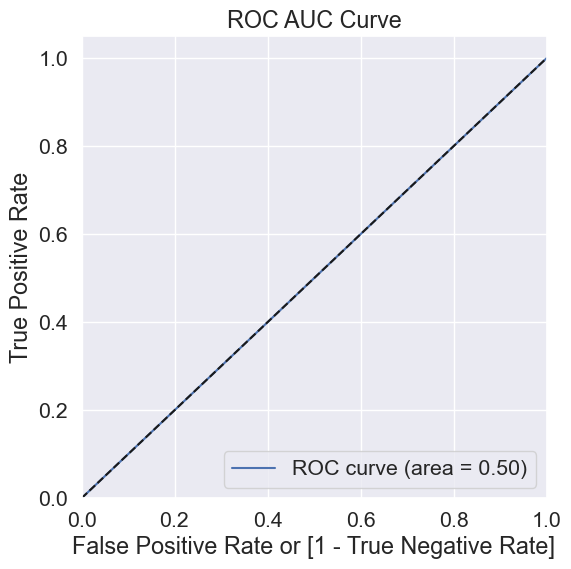

In [81]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

### Model 3. Decision Tree with PCA and GridSearchCV

In [82]:
dt = DecisionTreeClassifier(random_state=42)

In [83]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
pca = PCA(n_components=25)

In [84]:
#smote = SMOTE(random_state=2)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [85]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    scaler,
    pca,
    dt
)

In [86]:
# Create the parameter grid based on the results of random search 
params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
}

In [87]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [88]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=25)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10, 20,
                                                                      50,
                                                                      100]},
             scoring='accuracy', verbose=1)

In [89]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on train set using the best model
y_train_pred = grid_search.predict(X_train)

# Predict on validation set using the best model
y_test_pred = grid_search.predict(X_test)

In [90]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix:
[[49226  1033]
 [ 3878  1862]]


,Metric,Value
0,Accuracy,0.912302
1,Precision,0.643178
2,Recall,0.324390


In [91]:
# Metrics on the validation set
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12311   297]
 [  958   434]]


,Metric,Value
0,Accuracy,0.910357
1,Precision,0.593707
2,Recall,0.311782


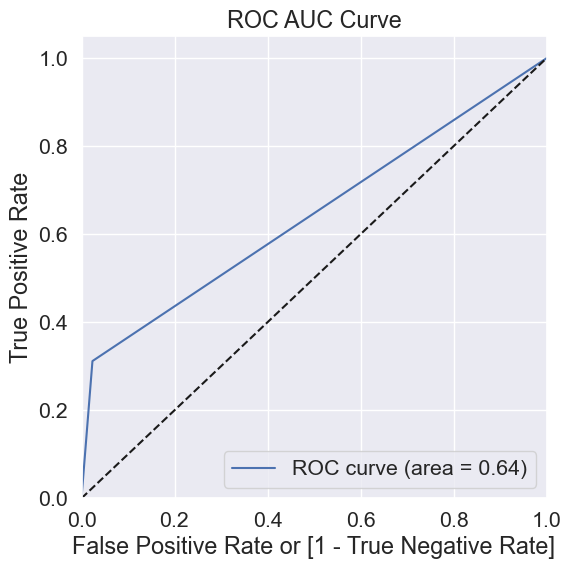

In [92]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

### Model 4. Random Forest Classifier with PCA and Hyperparameter Tuning

In [93]:
rf = RandomForestClassifier(random_state=42)

In [94]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    scaler,
    pca,
    rf
)

In [95]:
# Define the hyperparameters grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [100],  
    'randomforestclassifier__max_depth': [5, 10],       
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

In [96]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [97]:
%%time
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 26.2 s
Wall time: 2min 16s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=25)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [98]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on train set using the best model
y_train_pred = best_rf.predict(X_train)

# Predict on train set using the validation model
y_test_pred = best_rf.predict(X_test)

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}


In [99]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix:
[[50060   199]
 [ 3991  1749]]


,Metric,Value
0,Accuracy,0.925177
1,Precision,0.897844
2,Recall,0.304704


In [100]:
# Metrics on the validation set
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12519    89]
 [ 1124   268]]


,Metric,Value
0,Accuracy,0.913357
1,Precision,0.750700
2,Recall,0.192529


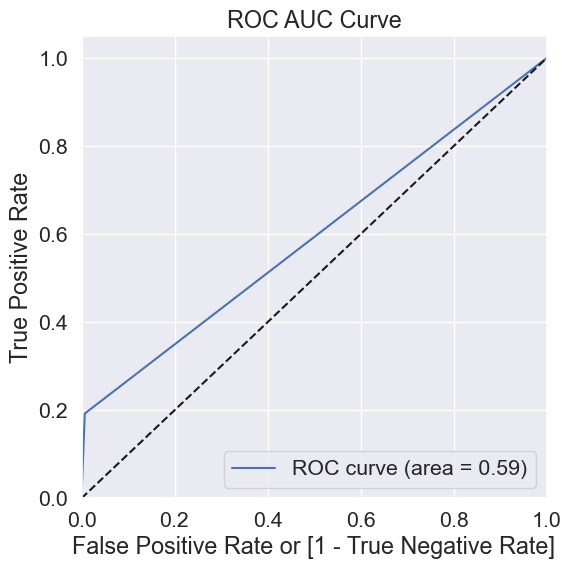

In [101]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

### Model 5. AdaBoost Classifier

In [102]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    scaler,
    pca,
    AdaBoostClassifier(n_estimators=200, random_state=42)
)

In [103]:
# Build the model
adaboost_model = pipe.fit(X_train, y_train)

In [104]:
# Predict on train set using the best model
y_train_pred = adaboost_model.predict(X_train)

# Predict on train set using the validation model
y_test_pred = adaboost_model.predict(X_test)

In [105]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix:
[[49128  1131]
 [ 4148  1592]]


,Metric,Value
0,Accuracy,0.905730
1,Precision,0.584649
2,Recall,0.277352


In [106]:
# Metrics on the validation set
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12312   296]
 [ 1013   379]]


,Metric,Value
0,Accuracy,0.906500
1,Precision,0.561481
2,Recall,0.272270


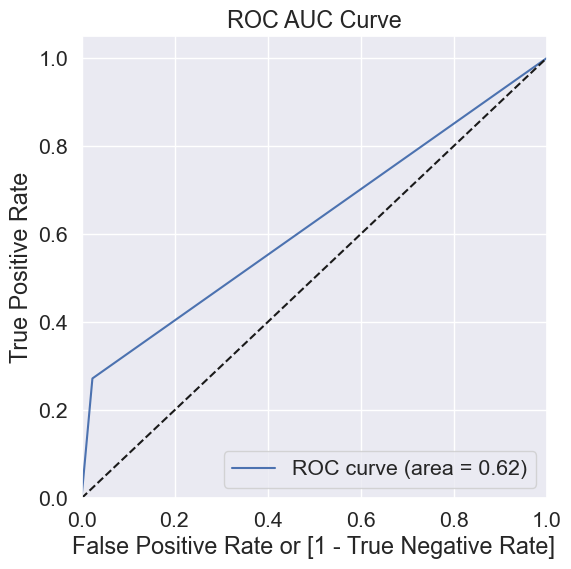

In [107]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

### Model 6. XGBoost Classifier

In [108]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    scaler,
    pca,
    XGBClassifier(random_state=42)
)

In [109]:
# Define hyperparameters for grid search
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],  
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.3]
}

In [110]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [111]:
%%time
# Train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 12.6 s
Wall time: 1min 59s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=25)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_ca...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__learning_rate': [0.01, 0.1, 0.3],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [112]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
Xgbbest_model = grid_search.best_estimator_

# Predict on train set using the best model
y_train_pred = Xgbbest_model.predict(X_train)

# Predict on train set using the validation model
y_test_pred = Xgbbest_model.predict(X_test)

Best Parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 200}


In [113]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix:
[[50018   241]
 [ 1461  4279]]


,Metric,Value
0,Accuracy,0.969607
1,Precision,0.946681
2,Recall,0.745470


In [114]:
# Metrics on the validation set
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12313   295]
 [  841   551]]


,Metric,Value
0,Accuracy,0.918857
1,Precision,0.651300
2,Recall,0.395833


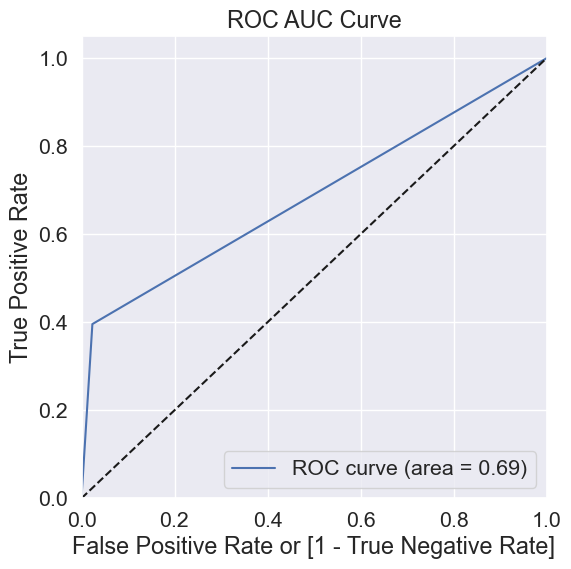

In [115]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

## XGBoost without PCA

In [139]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
#prediction_xgbr=xgbr.predict(X_train)
y_pred_train = xgb_cfl.predict(X_train)
y_pred_test = xgb_cfl.predict(X_test)
unseen_pred_xgb = xgb_cfl.predict(unseen)

In [142]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_pred_train)

Confusion Matrix:
[[49770   489]
 [  665  5075]]


,Metric,Value
0,Accuracy,0.979392
1,Precision,0.912114
2,Recall,0.884146


In [143]:
# Metrics on the validation set
calculate_classification_metrics(y_test, y_pred_test)

Confusion Matrix:
[[12332   276]
 [  516   876]]


,Metric,Value
0,Accuracy,0.943429
1,Precision,0.760417
2,Recall,0.629310


In [141]:
print('Accuracy of the model is:  ',accuracy_score(y_train, y_pred_train))
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred_test))

Accuracy of the model is:   0.9793924891515919
Accuracy of the model is:   0.9434285714285714


## ADABoost without PCA

In [147]:
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)

In [148]:
#Fitting Model
adaboost.fit(X_train, y_train)
#adaboost.fit(unseen)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [149]:
#pred
y_pred_train = adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)
unseen_pred_ada = adaboost.predict(unseen)

In [150]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_pred_train)

Confusion Matrix:
[[49128  1131]
 [ 2210  3530]]


,Metric,Value
0,Accuracy,0.940338
1,Precision,0.757348
2,Recall,0.614983


In [151]:
# Metrics on the validation set
calculate_classification_metrics(y_test, y_pred_test)

Confusion Matrix:
[[12349   259]
 [  553   839]]


,Metric,Value
0,Accuracy,0.942000
1,Precision,0.764117
2,Recall,0.602730


### Create `submission.csv` file for final submission on Kaggle

In [144]:
submission_data = unseen_filtered
submission_data.shape

(30000, 117)

In [145]:
unseen_filtered['churn_probability'] = unseen_pred_xgb
output = unseen_filtered[['churn_probability']]
output.head()

,churn_probability
0,0
1,0
2,1
3,0
4,0


In [146]:
output.to_csv('sub5.csv',index=True)

##  Important Predictors of Churn:

1) Total outgoing minutes (total_og_mou_8): The highest importance score suggests that reduced outgoing call activity may indicate a likelihood of churn. Customers making fewer calls may be dissatisfied or using alternative services.
2) Max recharge amount (max_rech_amt_8): A significant predictor; high recharge amounts may indicate a customer with high usage who could churn if not satisfied.
3) ARPU (arpu_8, arpu_7): These suggest a customer's average revenue is a key indicator. Decreases in ARPU over time might signal a shift in behavior that could lead to churn.
4) Total incoming minutes (total_ic_mou_8): This indicates whether customers are receiving fewer calls, possibly due to switching to other operators.
5) Recharges (total_rech_amt_8, total_rech_num_8, last_day_rch_amt_8): These show how frequently and how much customers recharge, crucial in understanding their engagement and future churn risk.
6) Data usage (vol_2g_mb_8, vol_3g_mb_8): Low data usage, especially in an increasingly data-driven market, could be an indicator of churn, particularly if the customer is switching to a competitor with better data plans.

## Strategic Recommendations:

1) Engagement Campaigns: Focus on customers showing decreased call volumes or recharge frequency. Offer discounts, targeted offers, or incentives to retain them.
2) Personalized Plans: For high ARPU customers, offer personalized or loyalty plans to ensure they feel valued. Tailoring recharge offers based on past patterns can help retain them.
3) Data-Focused Retention: With growing importance of data, offer special data packs or benefits to low-usage customers to boost their engagement.
4) Churn Risk Notifications: Automate alerts for high-risk customers based on the predictors above, so customer service can proactively engage with these customers before they churn.
5) Customer Satisfaction Programs: Conduct satisfaction surveys or offer bonuses for customer feedback to identify common churn reasons, such as service quality or pricing.